In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score

In [ ]:
#Importo il database e ne studio la struttura
df = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

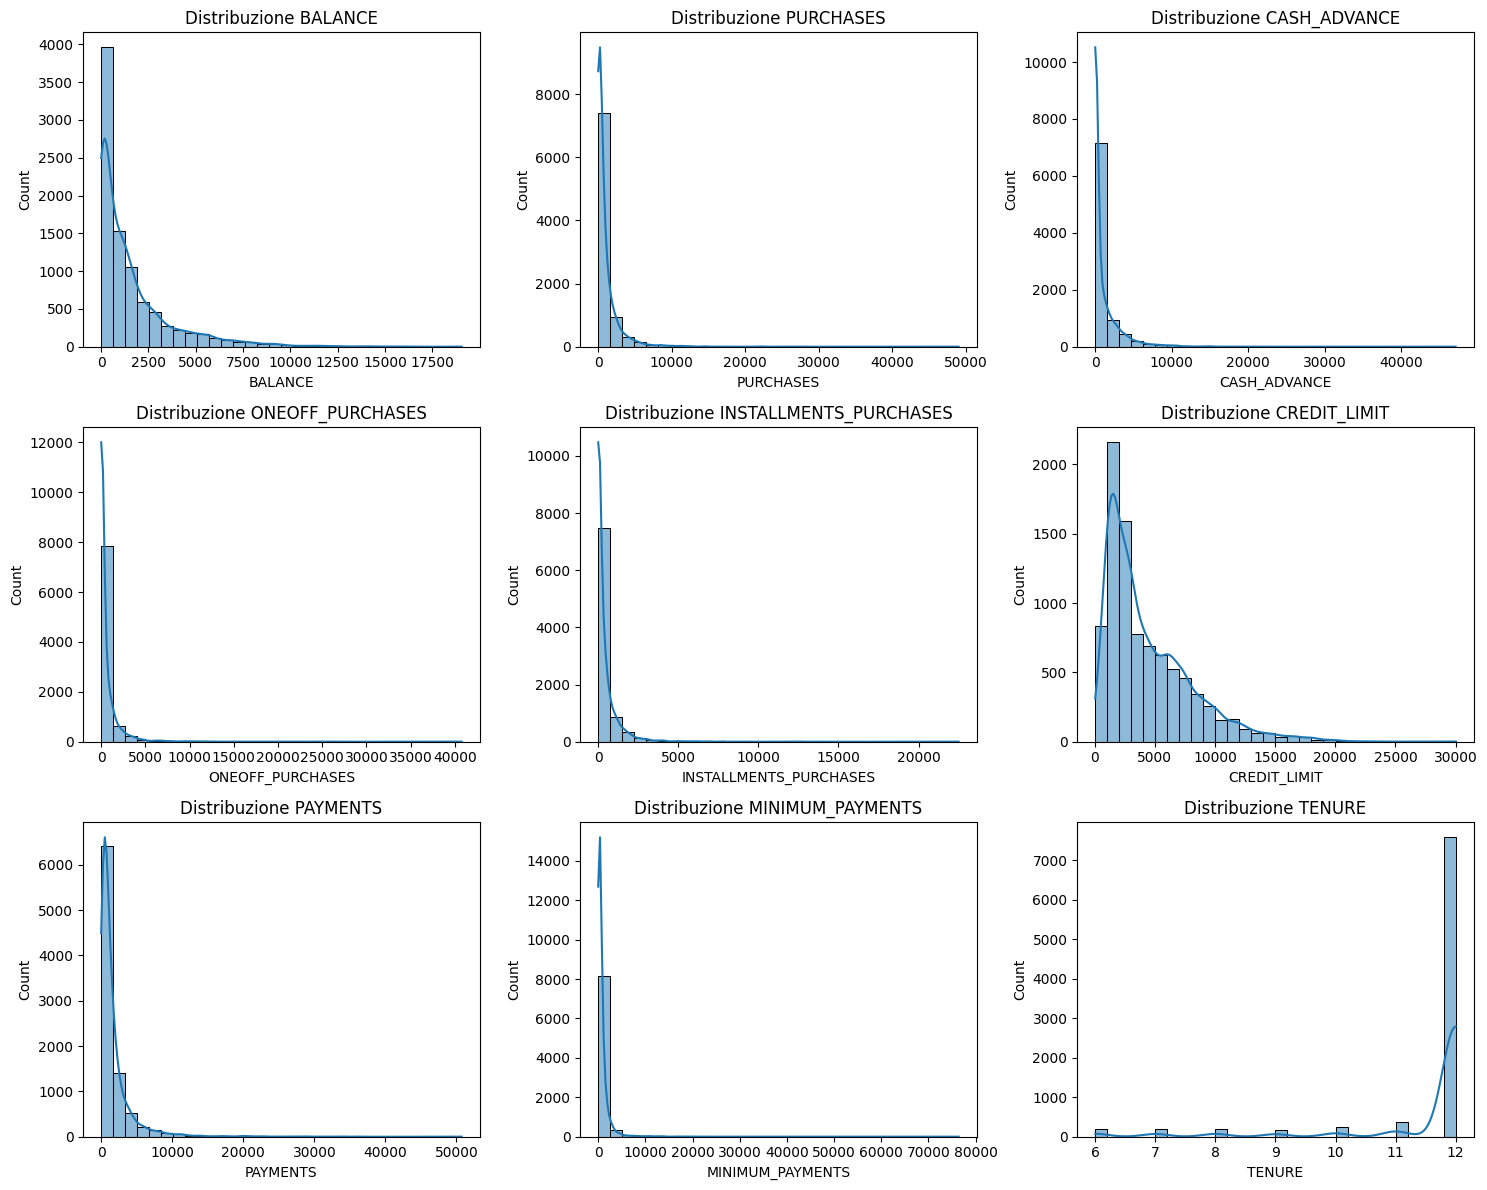

In [ ]:
# Visualizzo la distribuzione delle variabili con istogrammi
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
sns.histplot(df['BALANCE'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribuzione BALANCE')

sns.histplot(df['PURCHASES'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribuzione PURCHASES')

sns.histplot(df['CASH_ADVANCE'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribuzione CASH_ADVANCE')

sns.histplot(df['ONEOFF_PURCHASES'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribuzione ONEOFF_PURCHASES')

sns.histplot(df['INSTALLMENTS_PURCHASES'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribuzione INSTALLMENTS_PURCHASES')

sns.histplot(df['CREDIT_LIMIT'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Distribuzione CREDIT_LIMIT')

sns.histplot(df['PAYMENTS'], bins=30, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Distribuzione PAYMENTS')

sns.histplot(df['MINIMUM_PAYMENTS'], bins=30, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Distribuzione MINIMUM_PAYMENTS')

sns.histplot(df['TENURE'], bins=30, ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Distribuzione TENURE')

plt.tight_layout()
plt.show()

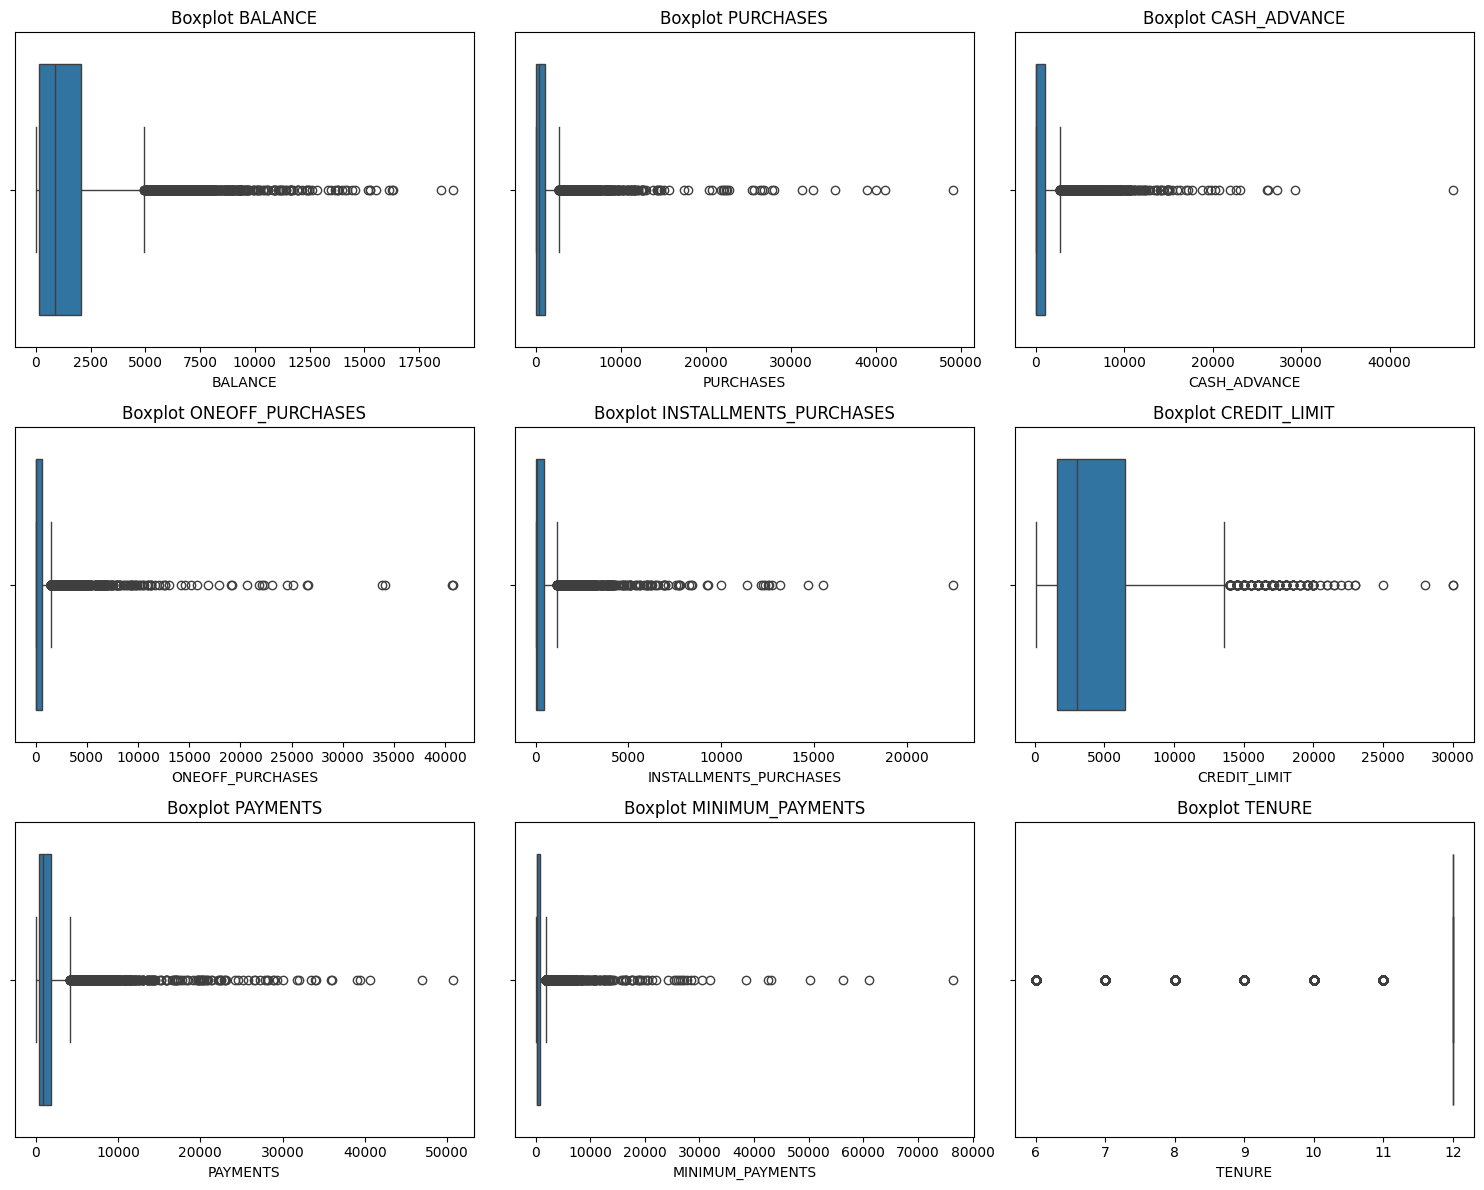

In [ ]:
# Visualizzo dei boxplot per identificare outlier
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
sns.boxplot(x=df['BALANCE'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot BALANCE')

sns.boxplot(x=df['PURCHASES'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot PURCHASES')

sns.boxplot(x=df['CASH_ADVANCE'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot CASH_ADVANCE')

sns.boxplot(x=df['ONEOFF_PURCHASES'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot ONEOFF_PURCHASES')

sns.boxplot(x=df['INSTALLMENTS_PURCHASES'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot INSTALLMENTS_PURCHASES')

sns.boxplot(x=df['CREDIT_LIMIT'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot CREDIT_LIMIT')

sns.boxplot(x=df['PAYMENTS'], ax=axes[2, 0])
axes[2, 0].set_title('Boxplot PAYMENTS')

sns.boxplot(x=df['MINIMUM_PAYMENTS'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot MINIMUM_PAYMENTS')

sns.boxplot(x=df['TENURE'], ax=axes[2, 2])
axes[2, 2].set_title('Boxplot TENURE')

plt.tight_layout()
plt.show()


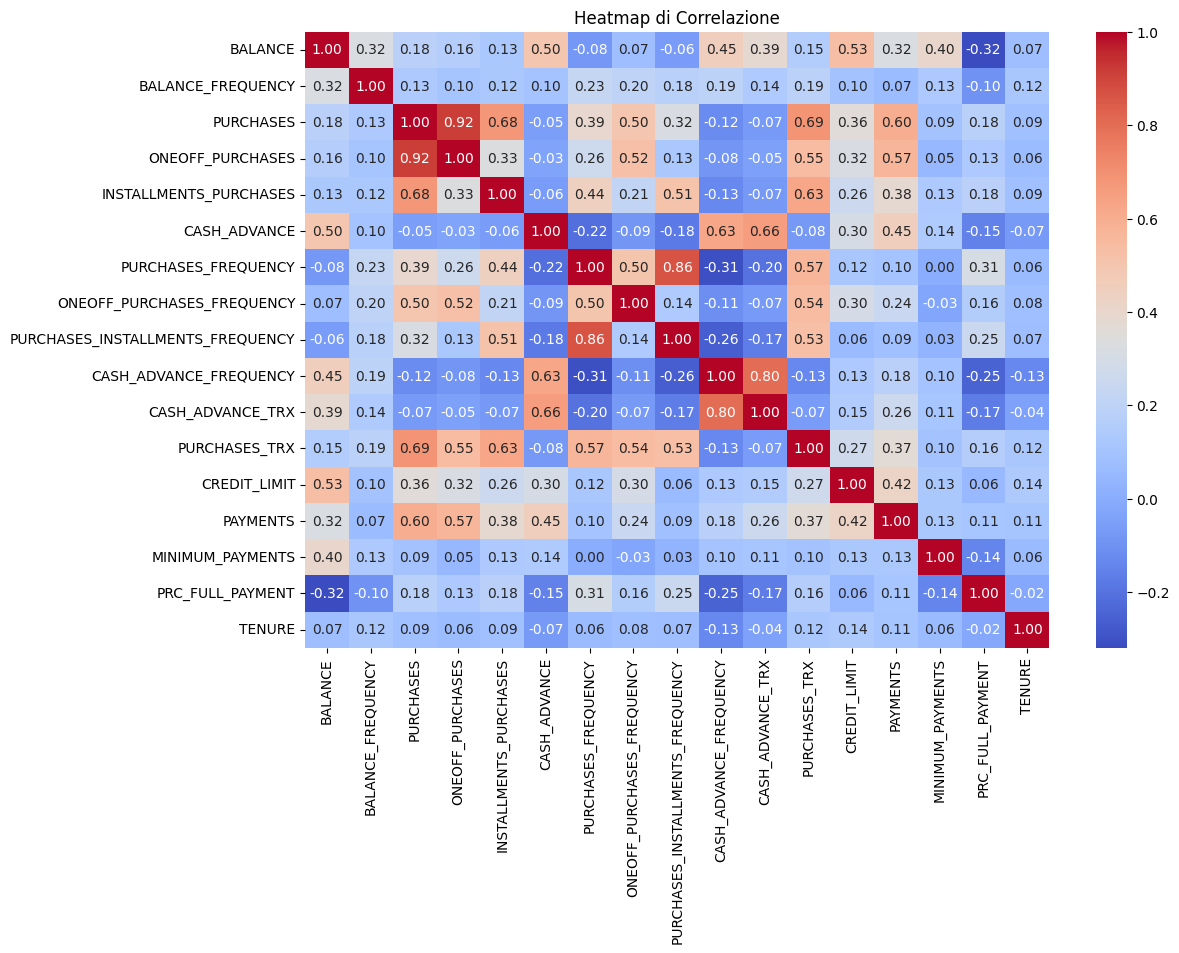

In [ ]:
# Costruisco la matrice di correlazione per valutare la dipendenza tra le variabili
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('CUST_ID', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap di Correlazione')
plt.show()

In [ ]:
#Controllo valori mancanti
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
#Correggo i valori mancanti in minimum_payments e credit limit con la media della rispettiva colonna essendo variabili numeriche
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [ ]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
#Effettuo la Standardizzazione delle variabili quantitative
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
features= df.columns.drop("CUST_ID")
to_std=df[features]

df[features]=(to_std-to_std.mean())/to_std.std()
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960380,-0.528949,-3.109502e-01,-0.525522,0.360659
1,C10002,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688601,0.818596,8.930522e-02,0.234214,0.360659
2,C10003,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826016,-0.383783,-1.016575e-01,-0.525522,0.360659
3,C10004,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826016,-0.598655,4.878032e-17,-0.525522,0.360659
4,C10005,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905414,-0.364347,-2.657764e-01,-0.525522,0.360659
5,C10006,0.117872,0.518055,0.154484,-0.356914,1.019765,-0.466759,0.439286,-0.678623,0.550753,-0.675311,-0.476043,-0.269930,-0.740516,-0.115053,6.620816e-01,-0.525522,0.360659
6,C10007,-0.450252,0.518055,2.849249,3.500352,0.306647,-0.466759,1.269772,2.673302,1.599110,-0.675311,-0.476043,1.982897,2.474996,1.596224,-2.858251e-01,2.893291,0.360659
7,C10008,0.124513,0.518055,-0.265373,-0.356914,0.027791,-0.466759,1.269772,-0.678623,1.599110,-0.675311,-0.476043,-0.109014,-0.603101,-0.364095,-1.425274e-01,-0.525522,0.360659
8,C10009,-0.264012,0.518055,-0.066326,0.041601,-0.233395,-0.466759,-0.391203,-0.399297,-0.287931,-0.675311,-0.476043,-0.390617,0.688601,-0.360913,-2.369544e-01,-0.525522,0.360659
9,C10010,-0.678466,-1.400634,0.130296,0.415186,-0.454551,-0.466759,-0.806445,-0.119968,-0.916944,-0.675311,-0.476043,-0.471076,1.787921,-0.196325,-3.277732e-01,-0.525522,0.360659


In [ ]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

In [ ]:
#Utilizzo l'elbow method per definire il numero dei cluster
def plot_ssd_curve(X,k_range=(1,10)):
    ssd={}
    for k in range(k_range[0],k_range[1]):
      kmeans=KMeans(n_clusters=k,init="k-means++",random_state=2)
      kmeans.fit(X)
      ssd[k]=kmeans.inertia_
    plt.plot(list(ssd.keys()),list(ssd.values()),marker="o")
    plt.xlabel("Numero di cluster", fontsize=16)
    plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
    plt.show()

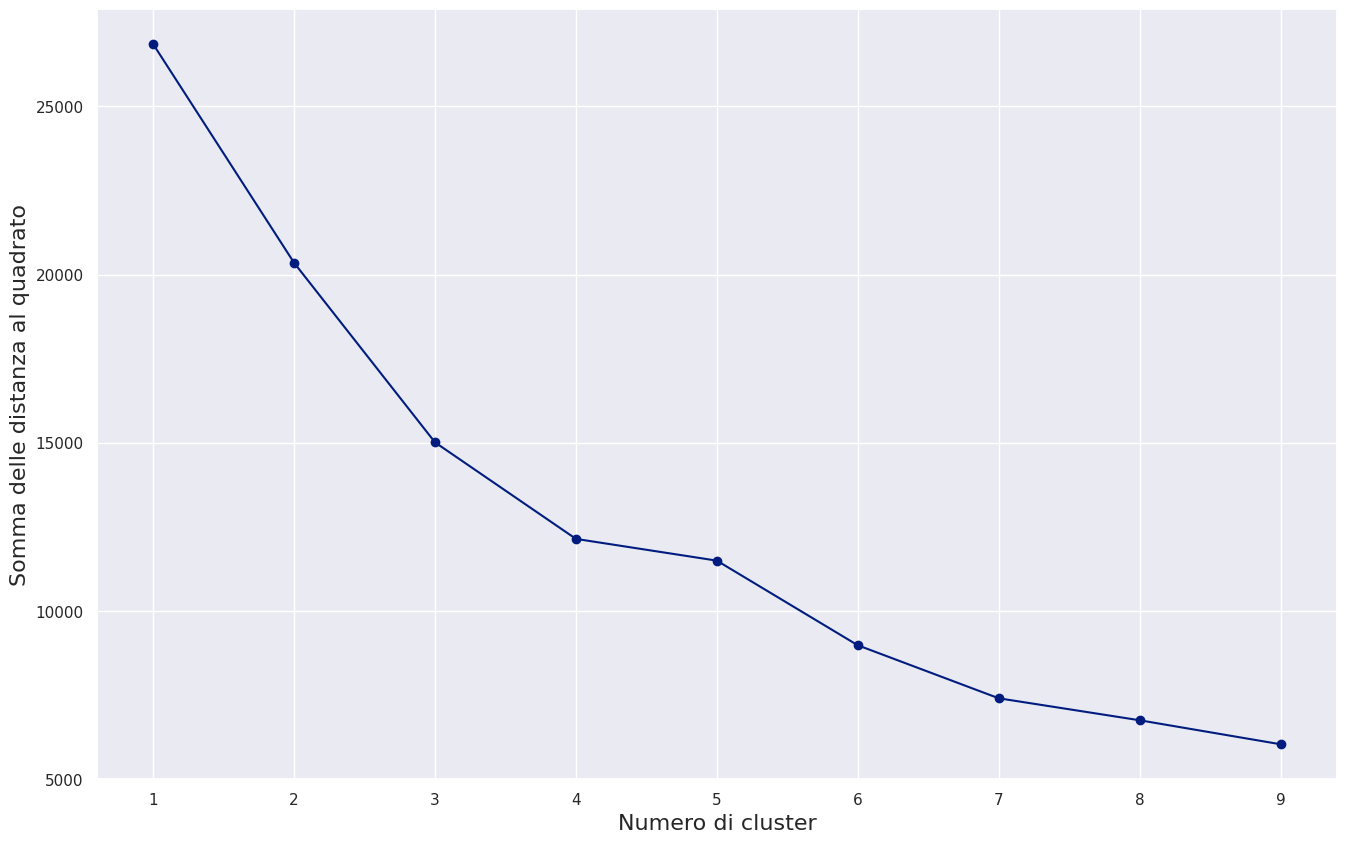

In [ ]:
#Cluster 1: Spese medie (bilancio, acquisti in unica soluzione, acquisti a rate)
X=df[["BALANCE","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].values
plot_ssd_curve(X)

Possiamo stabilire come k ottimale: **K=5** perchè dal 6 in poi la curva decresce quasi linermente.

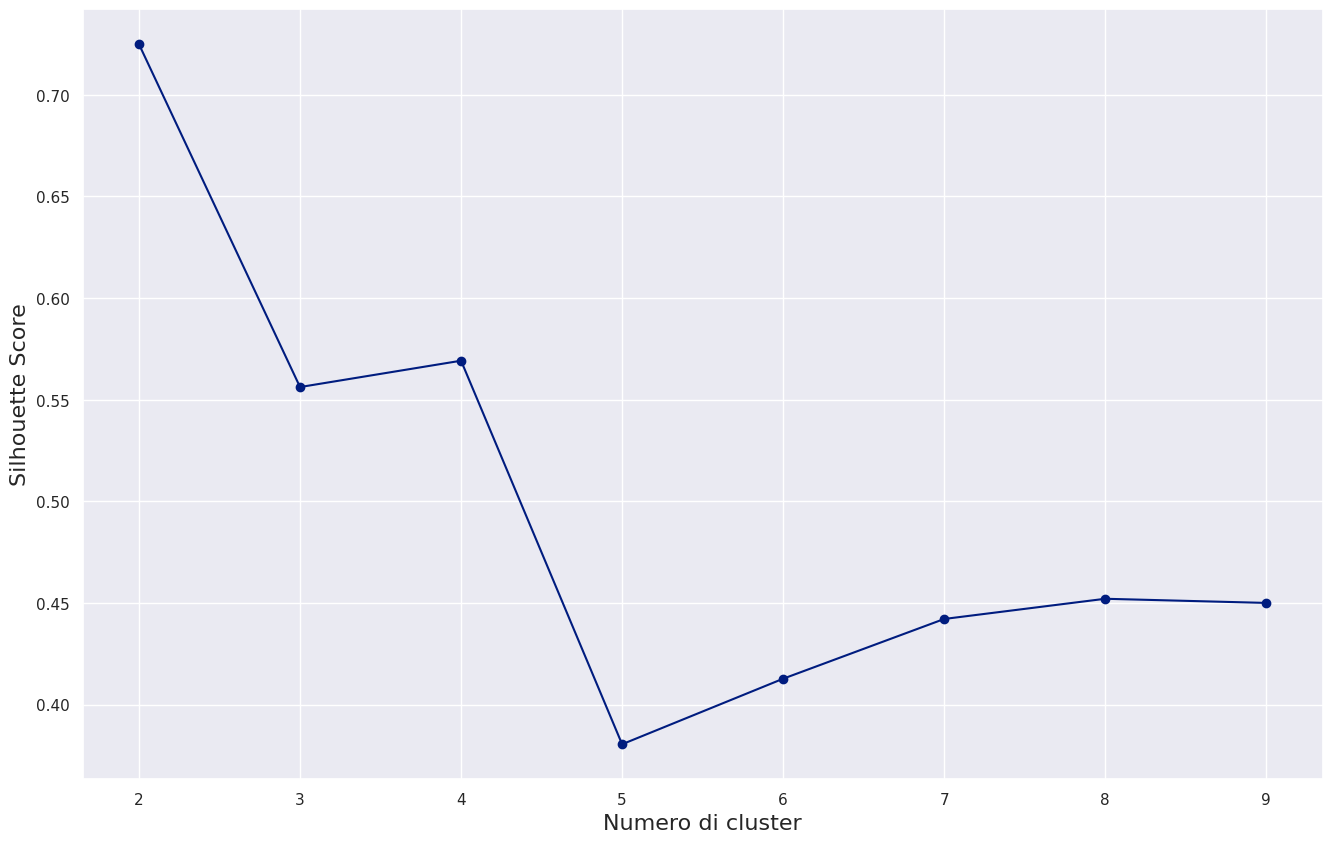

In [ ]:
#Controllo il numero di cluster che massimizza il Silhouette Score per avere un ulteriore criterio per la scelta di k.
def calculate_silhouette_scores(X, k_range=(2, 10)):
    silhouette_scores = {}
    for k in range(k_range[0], k_range[1]):
        kmeans = KMeans(n_clusters=k, random_state=2)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores[k] = score
    return silhouette_scores

silhouette_scores = calculate_silhouette_scores(X)
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o")
plt.xlabel("Numero di cluster", fontsize=16)
plt.ylabel("Silhouette Score", fontsize=16)
plt.show()

In [ ]:
#Utilizzo la tecnica dei kmeans per identificare i gruppi di clienti omogenei
kmeans = KMeans(n_clusters=5, random_state=2, init="k-means++")
kmeans.fit(X)

KMeans(n_clusters=5, random_state=2)

In [ ]:
kmeans.inertia_

11490.926801277852

In [ ]:
#Visualizzo i cluster
def plot_clusters3d(model, data, axlabels=None):
   centers=model.cluster_centers_
   y_kmeans = model.predict(X)

   ax = plt.axes(projection ="3d")
   ax.scatter3D(data[:,0], data[:,1], data[:,2], edgecolors= "black", c=y_kmeans)
   ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], color="red", s=100)

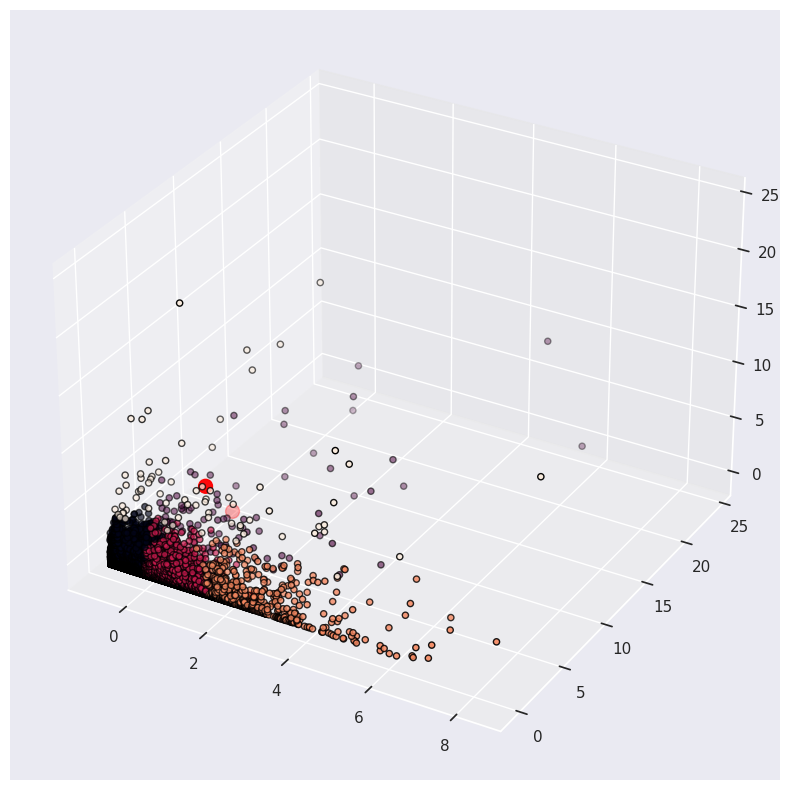

In [ ]:
plot_clusters3d(kmeans,X)

In [ ]:
#Assegno i Cluster ai Clienti
df['Cluster'] = kmeans.labels_

In [ ]:
# Calcolo delle medie delle caratteristiche per ciascun cluster
cluster_summary = df.drop("CUST_ID",axis=1).groupby('Cluster').mean()
print(cluster_summary)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0       -0.499024          -0.199109  -0.133576         -0.128469   
1        0.727797           0.432613   5.423297          6.390277   
2        0.638217           0.443684  -0.043211          0.001725   
3        2.683783           0.486486   0.104817          0.081312   
4        1.184460           0.429380   4.402915          1.754957   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     -0.079794     -0.267250             0.040312   
1                      1.083845     -0.091329             1.009852   
2                     -0.105497      0.402802            -0.183031   
3                      0.098183      1.413645            -0.123006   
4                      7.190007     -0.122453             1.123315   

         ONEOFF_PURCHASES

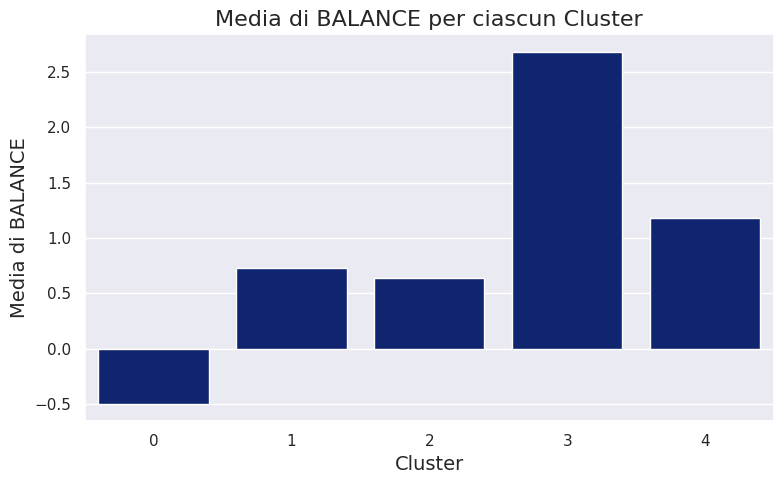

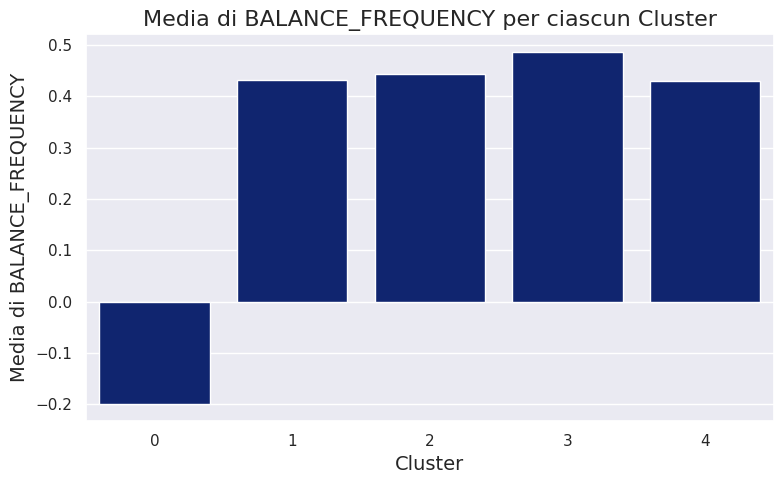

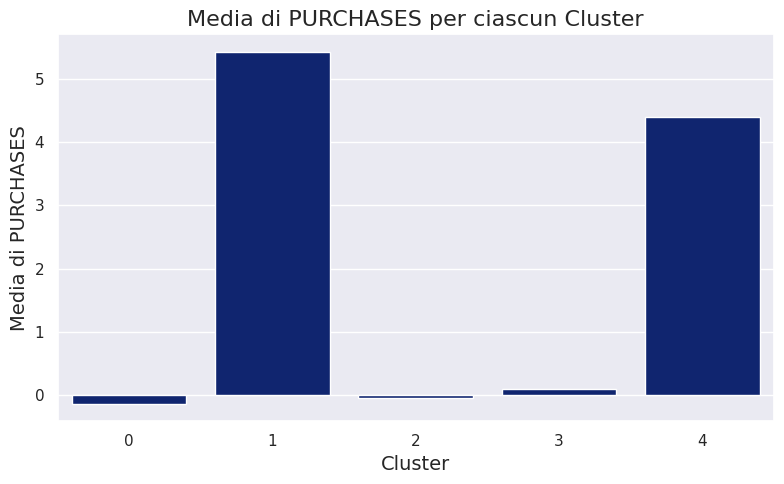

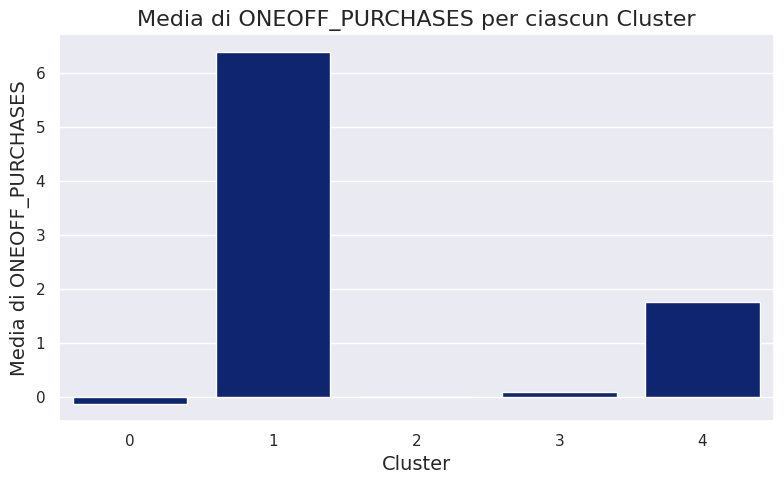

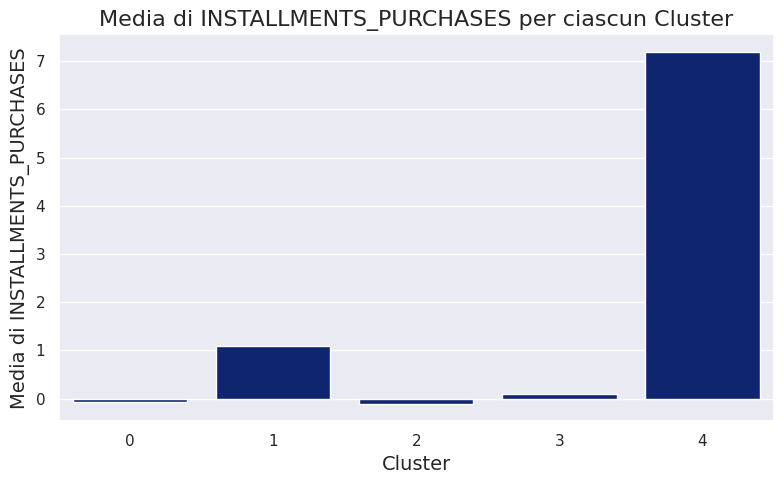

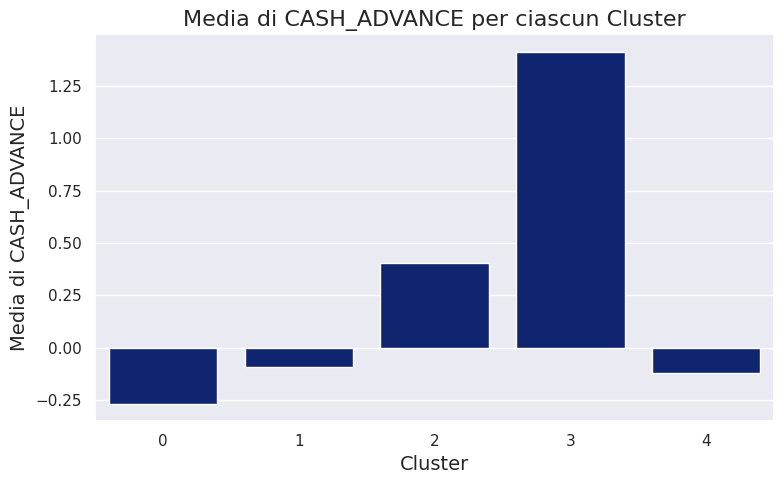

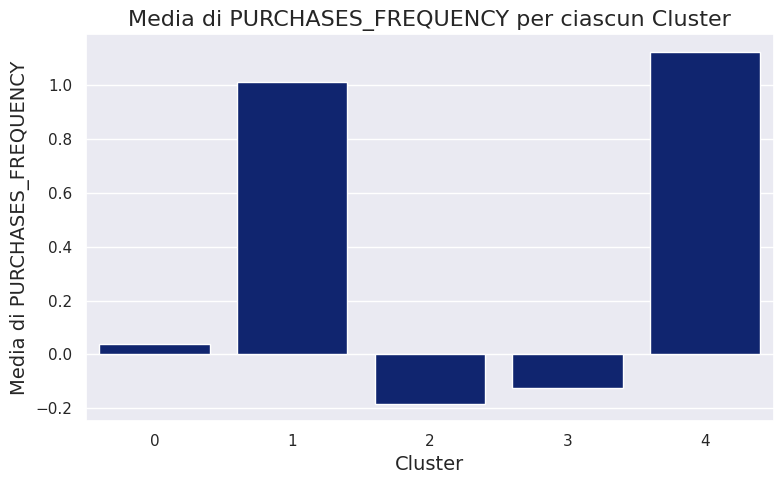

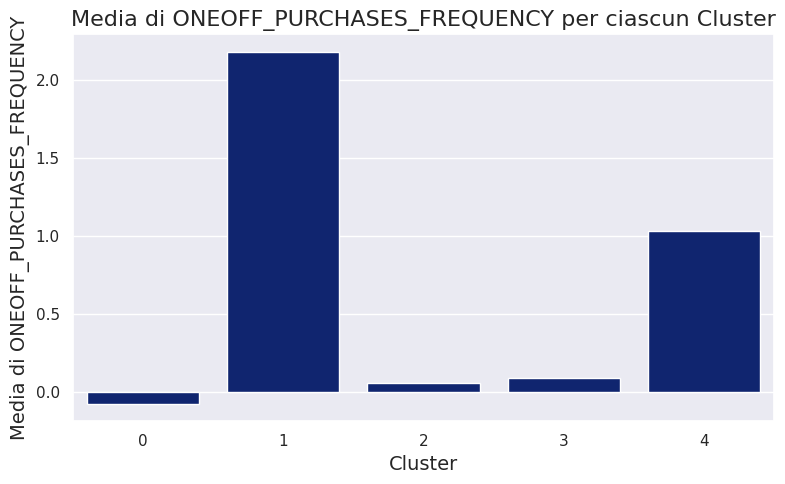

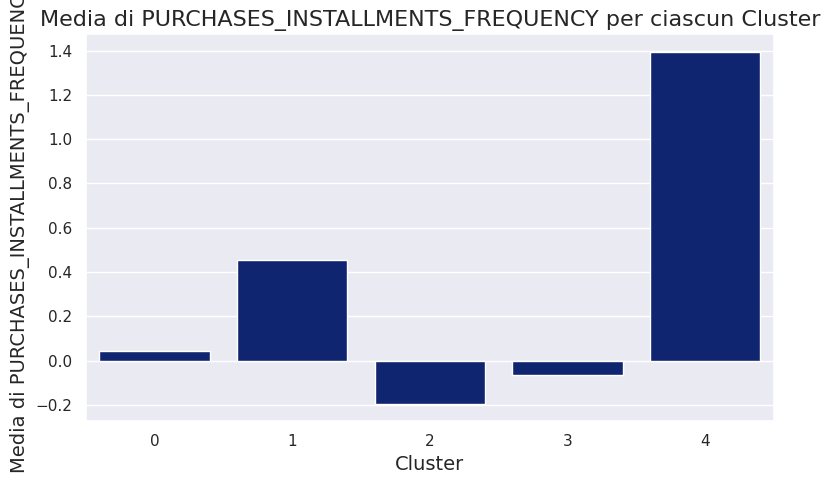

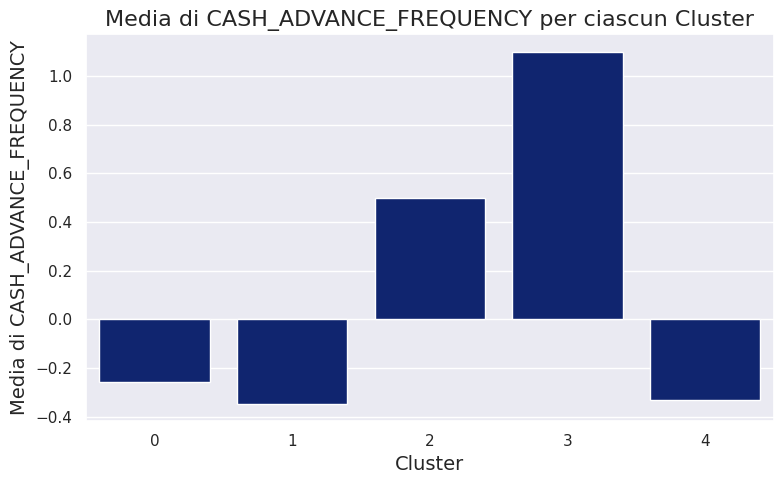

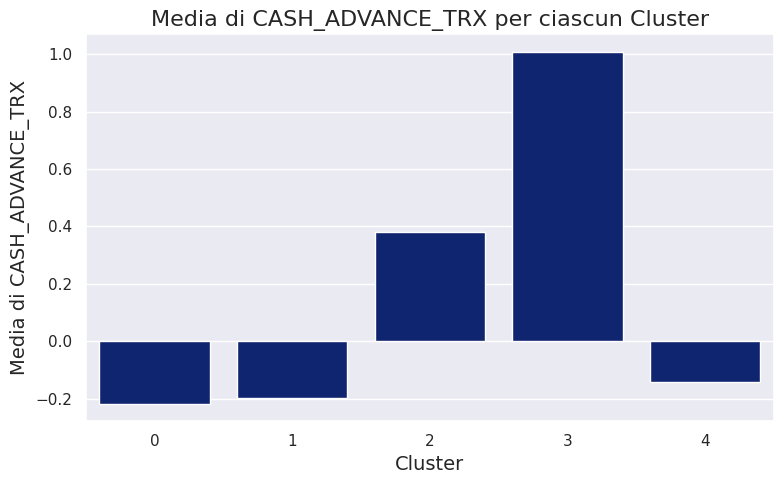

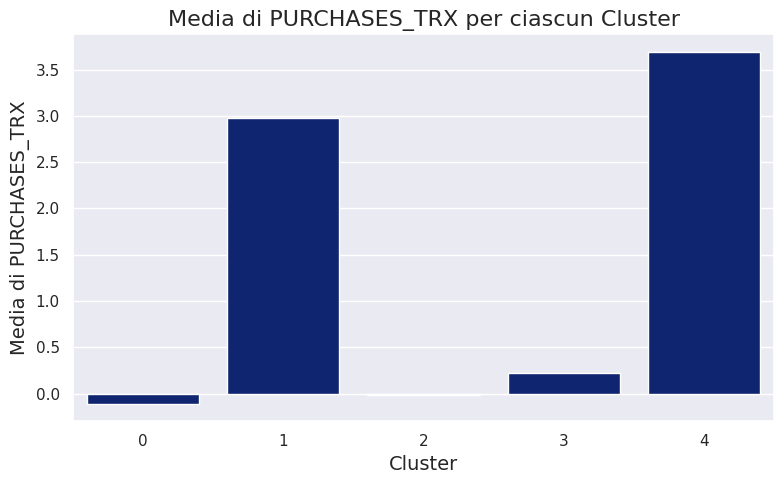

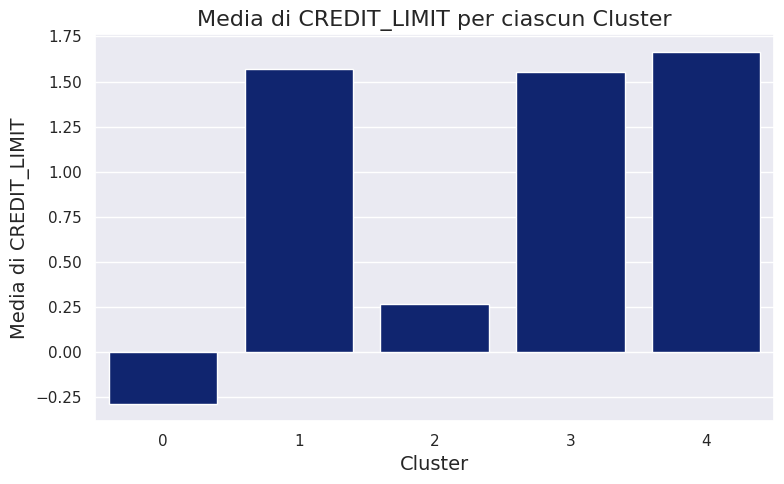

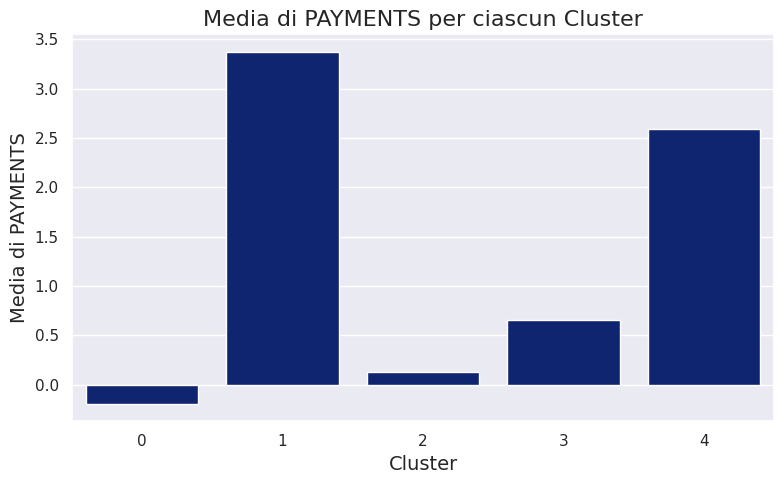

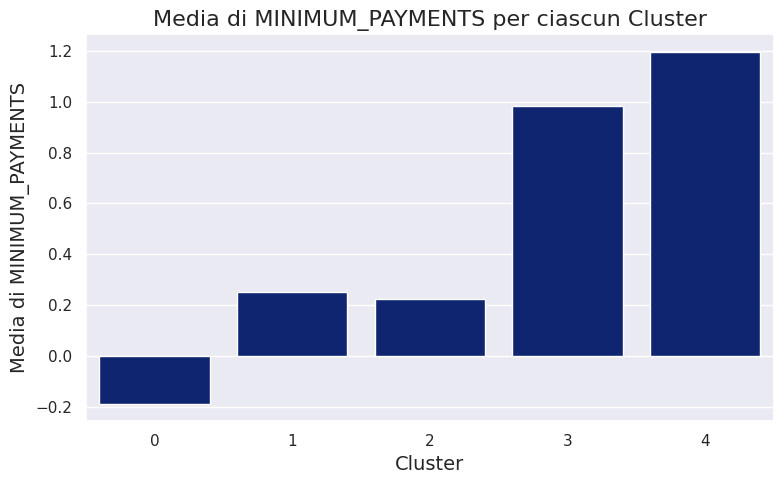

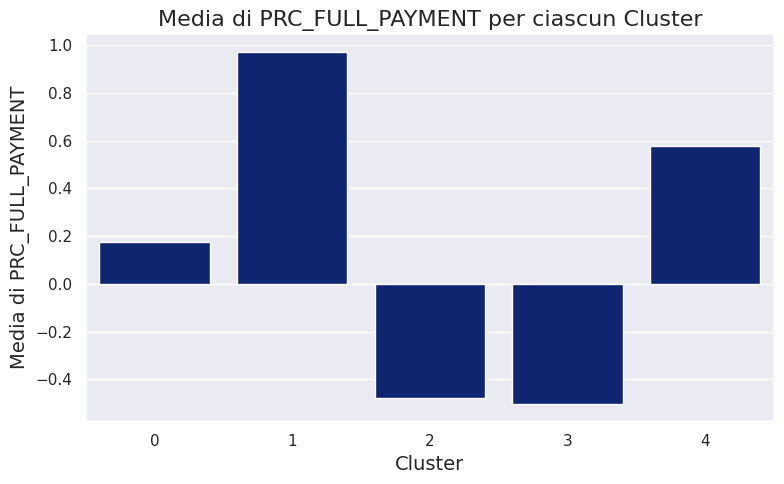

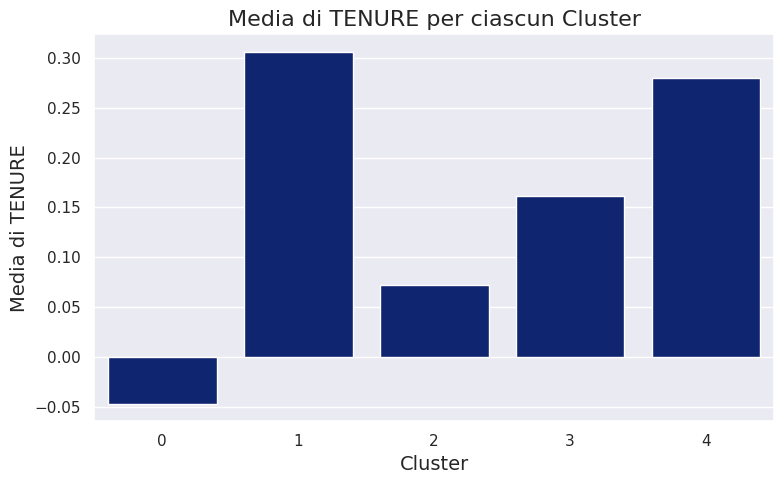

In [ ]:
for column in cluster_summary.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[column])
    plt.title(f'Media di {column} per ciascun Cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel(f'Media di {column}', fontsize=14)
    plt.tight_layout()
    plt.show()

Per il **Cluster 4** con Alto Saldo e Frequenti Acquisti in Unica Soluzione si potrebbe pensare di offrire premi o incentivi per l'utilizzo continuato, come cashback o punti fedeltà. Questi clienti potrebbero essere interessati a carte con maggiori benefici. Inoltre i clienti che utilizzano maggiormente gli Acquisti a Rate potrebbero essere interessati a offerte speciali su acquisti a rate o si potrebbe aumentare il limite di credito per facilitare acquisti più grandi.

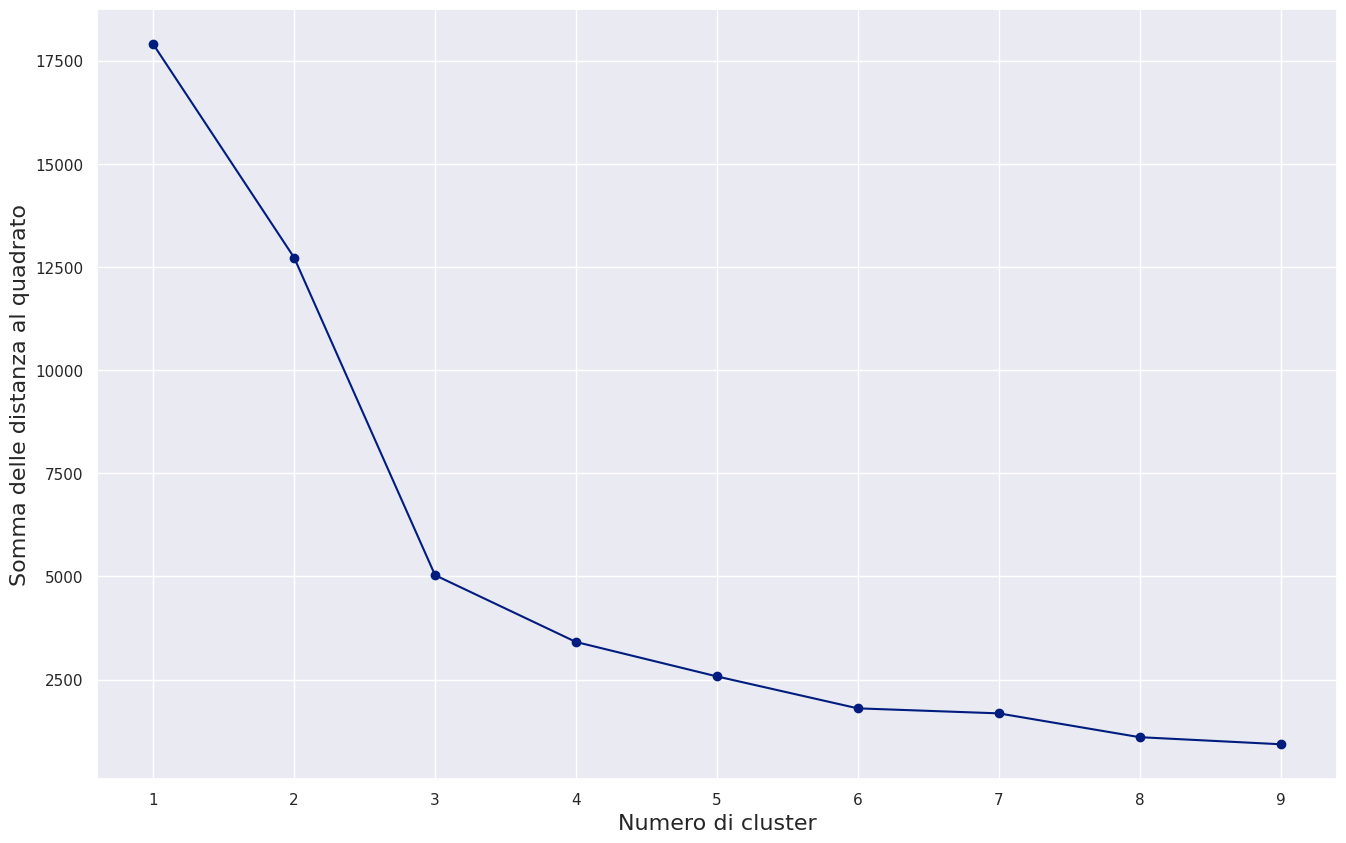

In [ ]:
#Cluster 2: Abitudini di pagamento (pagamenti minimi, pagamenti completi)
X=df[["MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]].values
plot_ssd_curve(X)

Possiamo stabilire come k ottimale: **K=7** perchè dal 8 in poi la curva decresce quasi linermente.

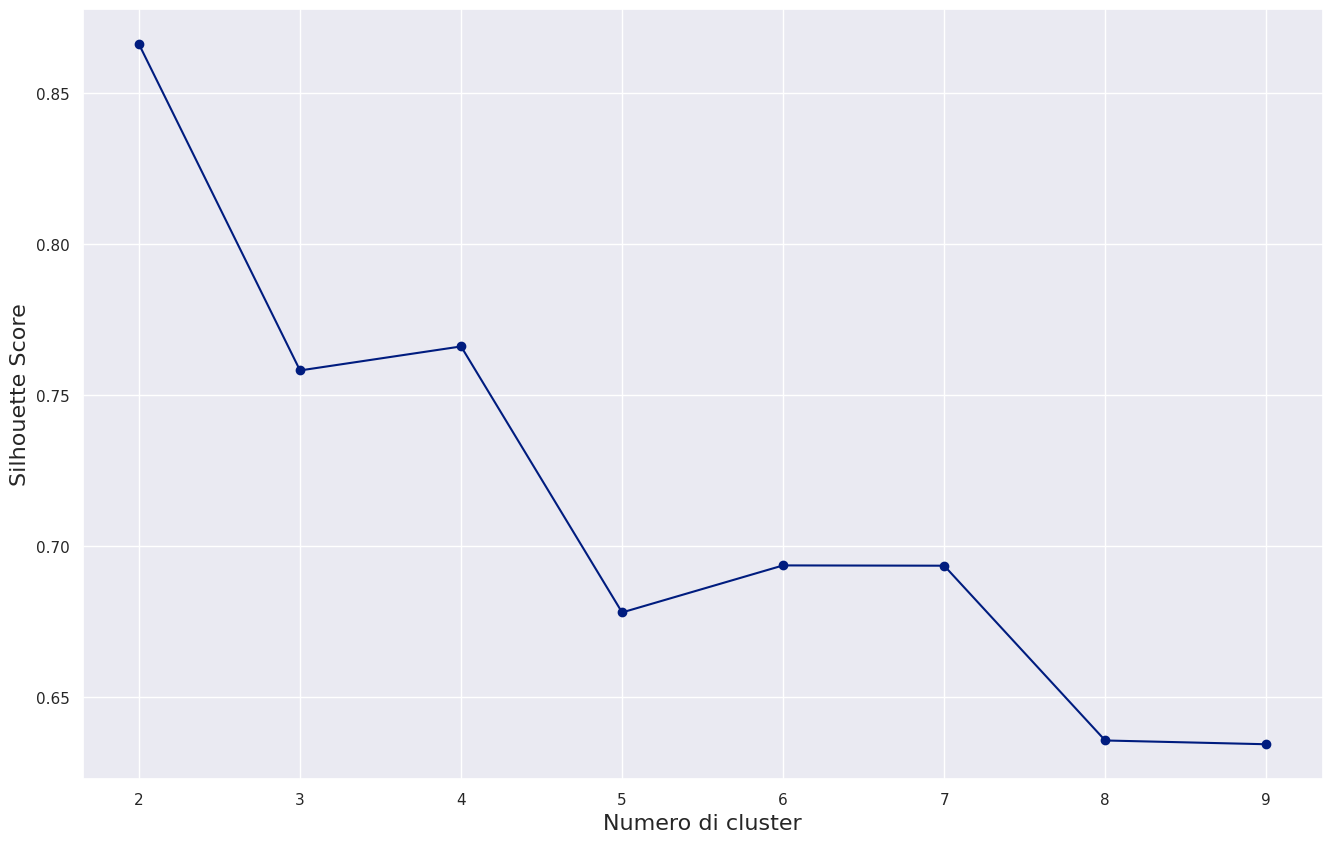

In [ ]:
#Controllo il numero di cluster che massimizza il Silhouette Score per avere un ulteriore criterio per la scelta di k.
silhouette_scores = calculate_silhouette_scores(X)
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o")
plt.xlabel("Numero di cluster", fontsize=16)
plt.ylabel("Silhouette Score", fontsize=16)
plt.show()

In [ ]:
#Utilizzo la tecnica dei kmeans per identificare i gruppi di clienti omogenei
kmeans = KMeans(n_clusters=7, random_state=2, init="k-means++")
kmeans.fit(X)

KMeans(n_clusters=7, random_state=2)

In [ ]:
kmeans.inertia_

1682.160985917499

In [ ]:
#Visualizzo i cluster
def plot_clusters(model,data,axlabels=None,print_ssd=False):
    centers=model.cluster_centers_
    y_kmeans=model.predict(X)
    sns.scatterplot(x=data[:,0],y=data[:,1],s=100,hue=y_kmeans)
    plt.scatter(centers[:,0],centers[:,1],c="red",s=200,alpha=0.5)

    if axlabels!=None:
        plt.xlabel(axlabels[0], fontsize=16)
        plt.ylabel(axlabels[1], fontsize=16)

    if print_ssd:
        plt.text(X[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}")

    plt.show()

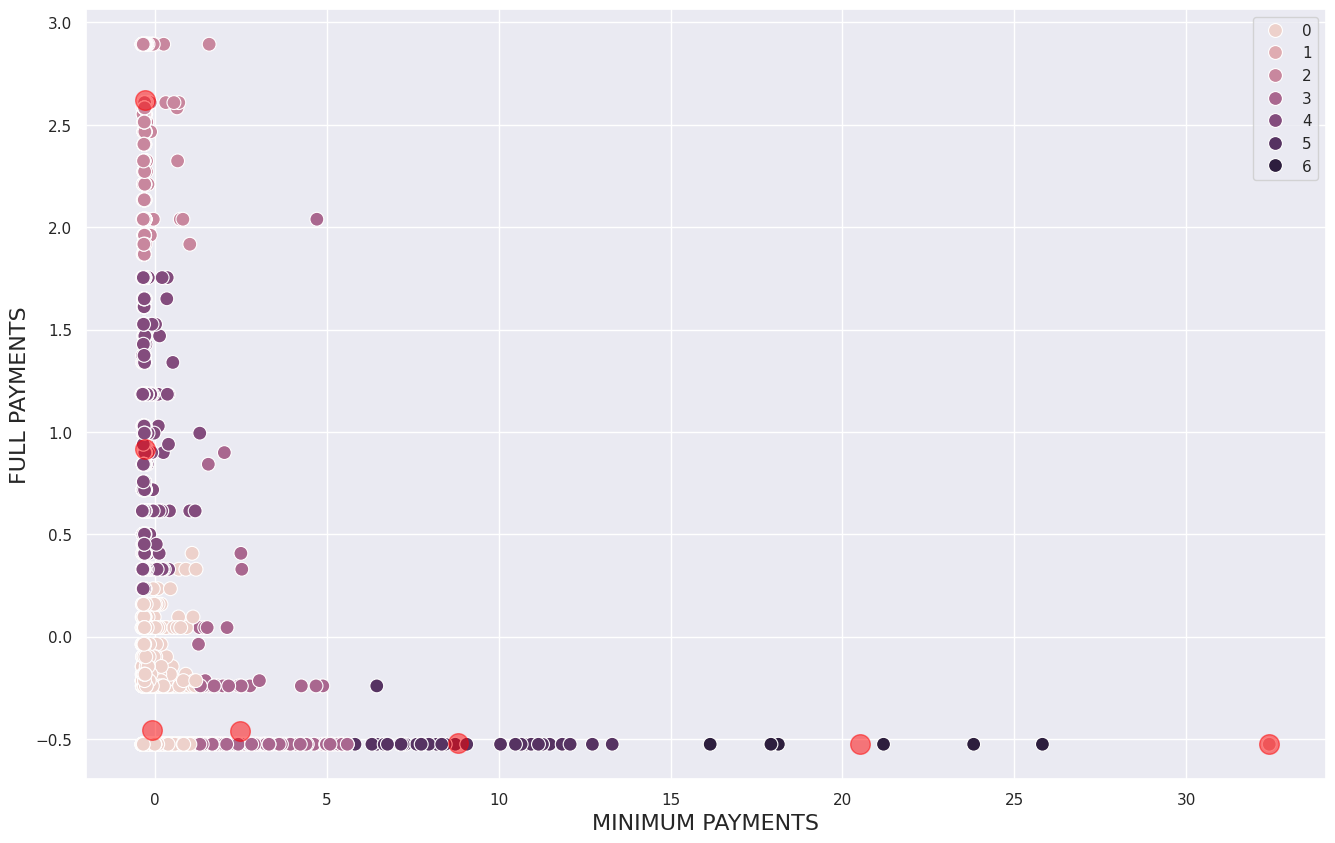

In [ ]:
plot_clusters(kmeans,X,axlabels=["MINIMUM PAYMENTS","FULL PAYMENTS"])

In [ ]:
#Assegno i Cluster ai Clienti
df['Cluster'] = kmeans.labels_

In [ ]:
# Calcolo delle medie delle caratteristiche per ciascun cluster
cluster_summary = df.drop("CUST_ID",axis=1).groupby('Cluster').mean()
print(cluster_summary)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0        0.109165           0.036197  -0.102096         -0.065560   
1        4.327071           0.518055   3.152750         -0.356914   
2       -0.655758          -0.161565   0.489755          0.373815   
3        1.660470           0.467458   0.546800          0.285093   
4       -0.618161          -0.231613   0.103806          0.027520   
5        1.637074           0.450336   0.910594          0.704037   
6        2.142677           0.518055  -0.137071         -0.356914   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     -0.120910      0.062143            -0.169944   
1                      8.103620     -0.466759             1.269772   
2                      0.471440     -0.412450             0.728237   
3                      0.768

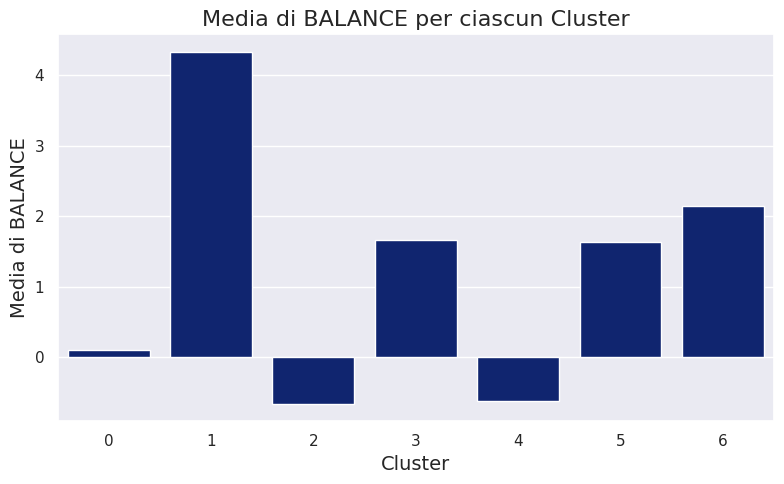

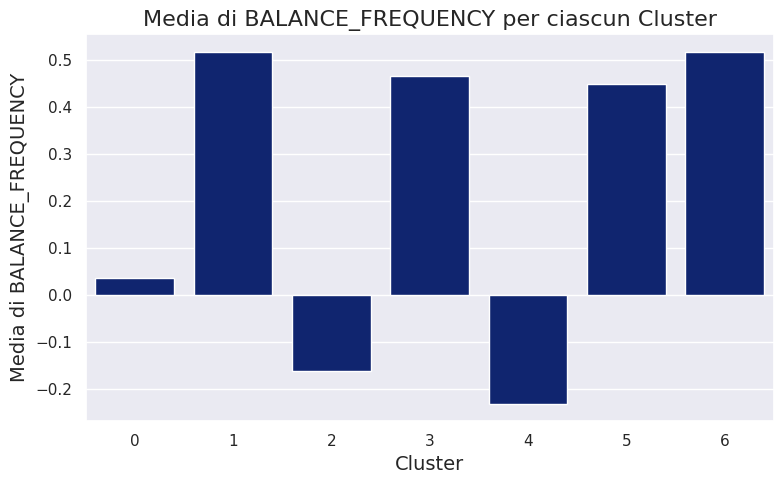

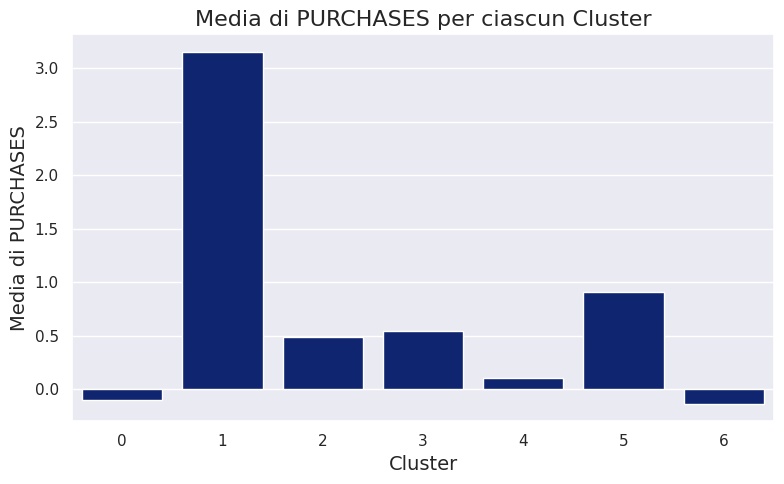

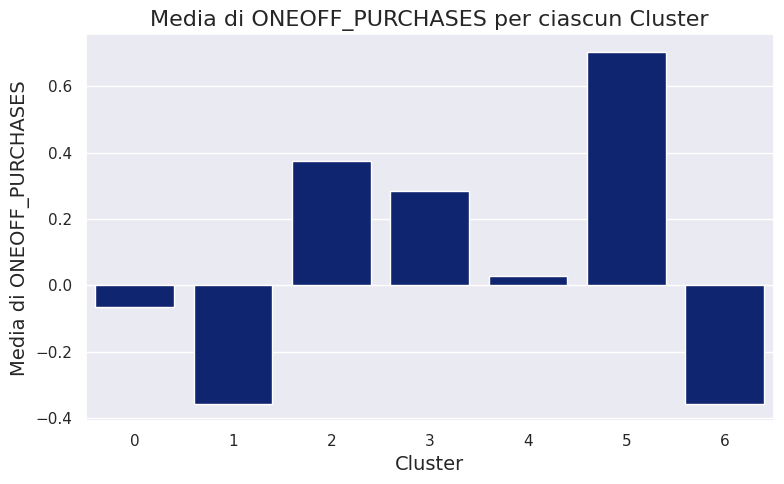

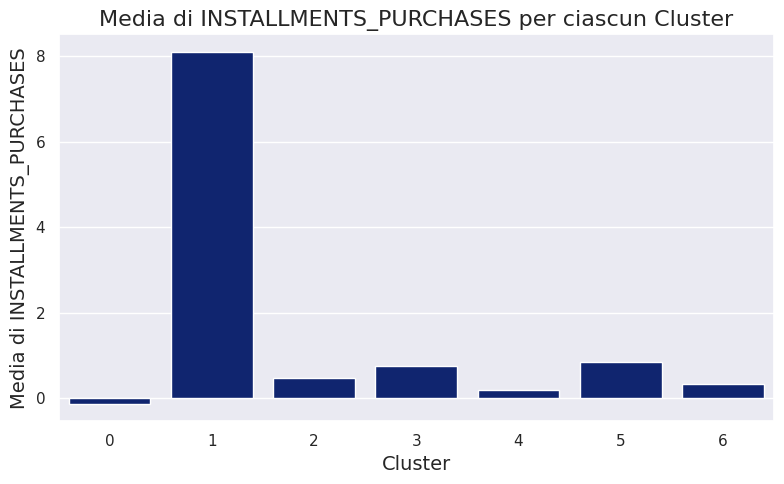

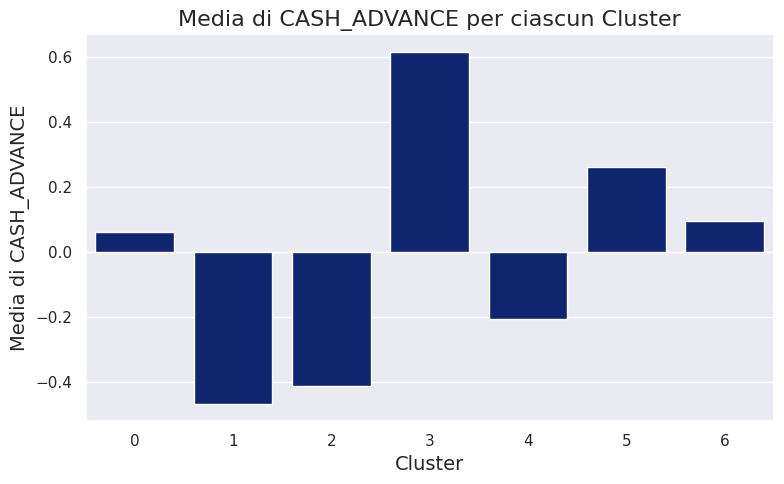

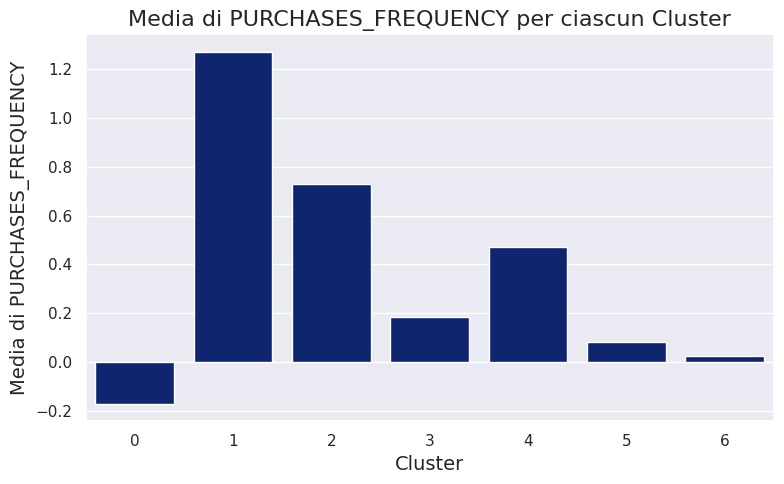

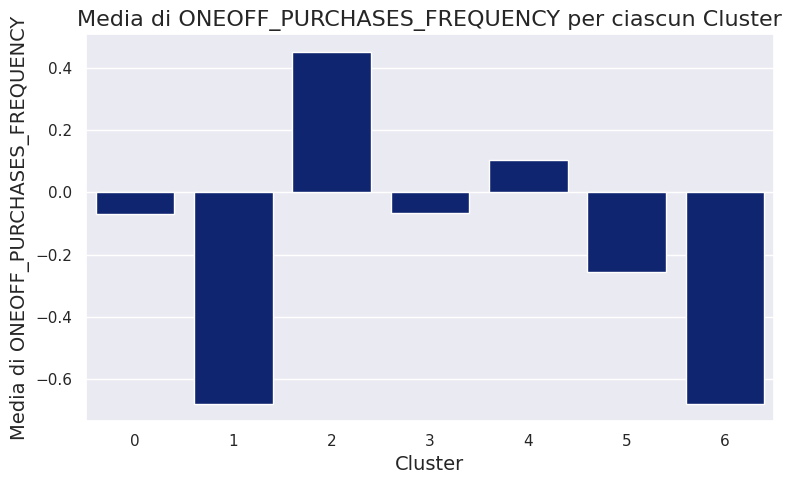

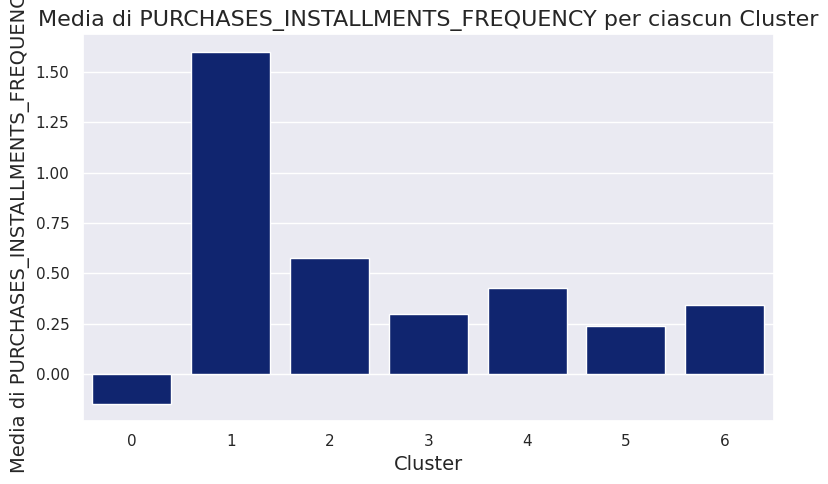

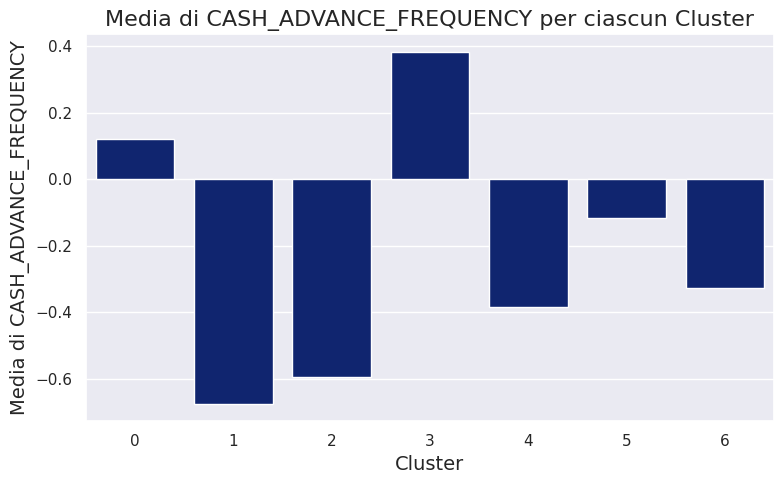

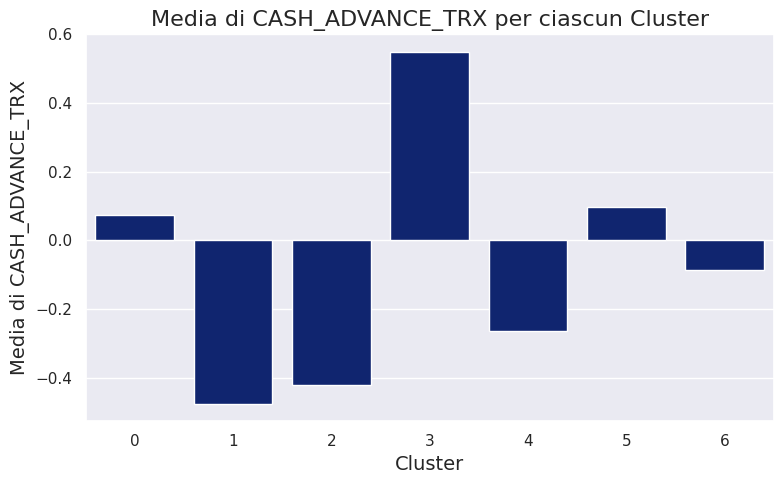

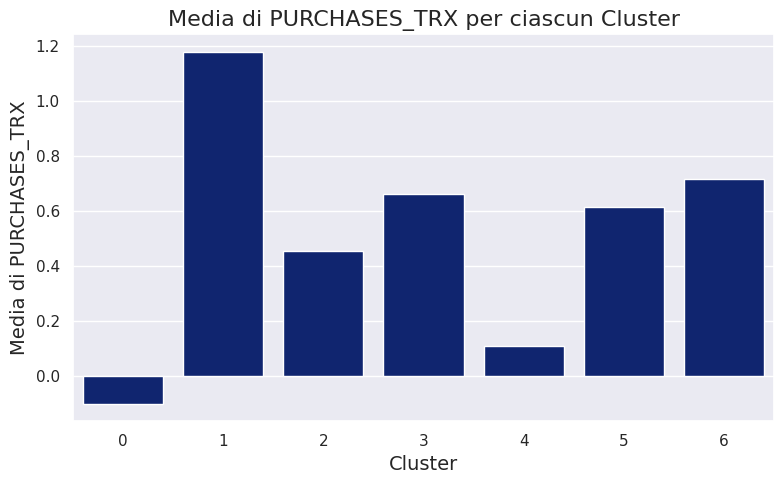

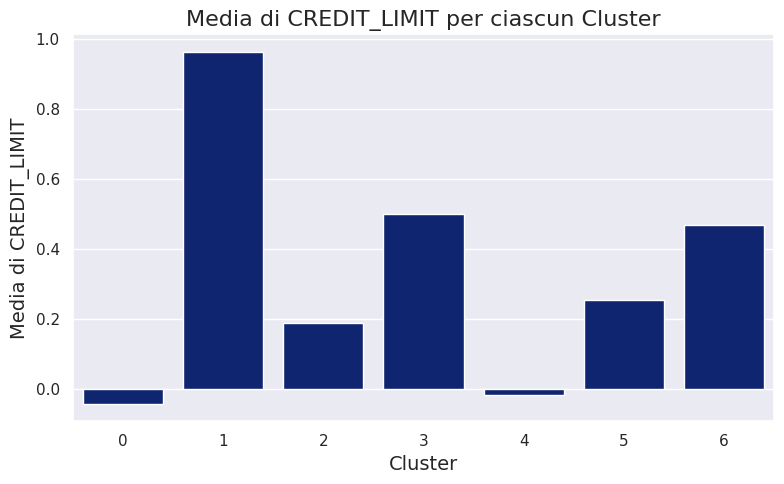

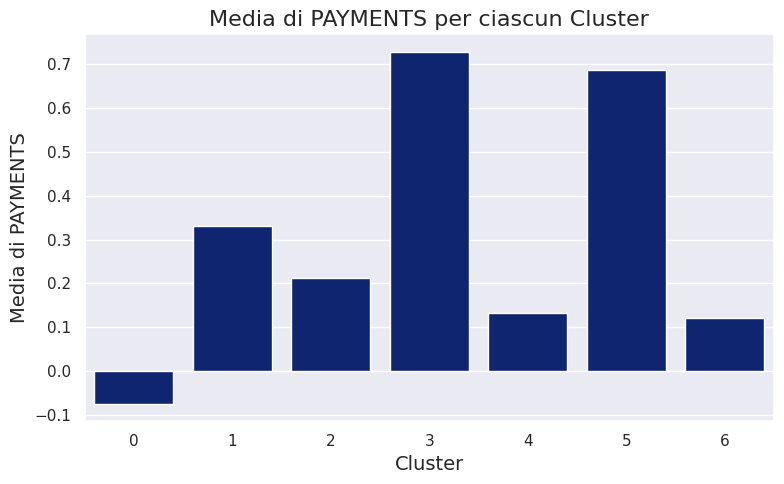

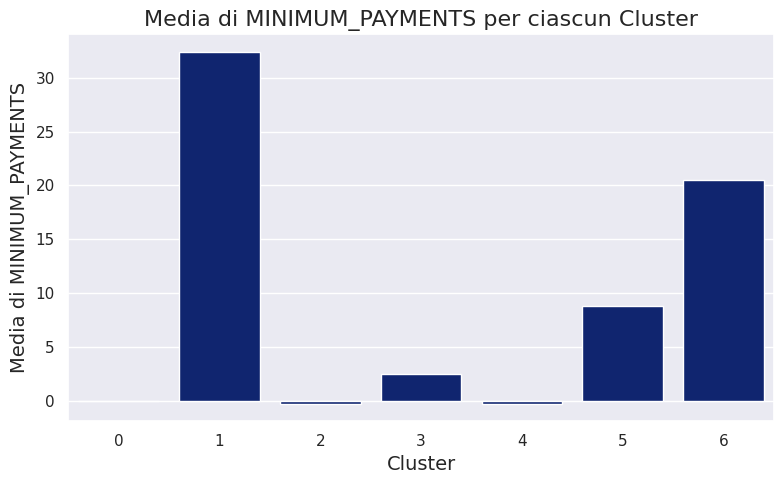

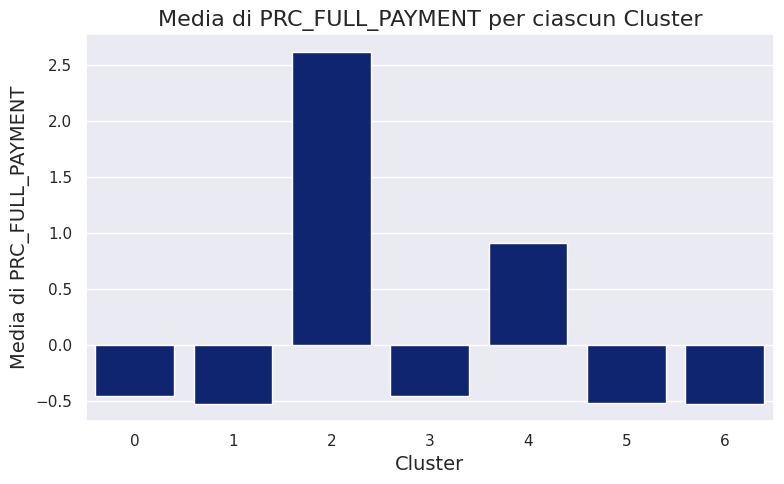

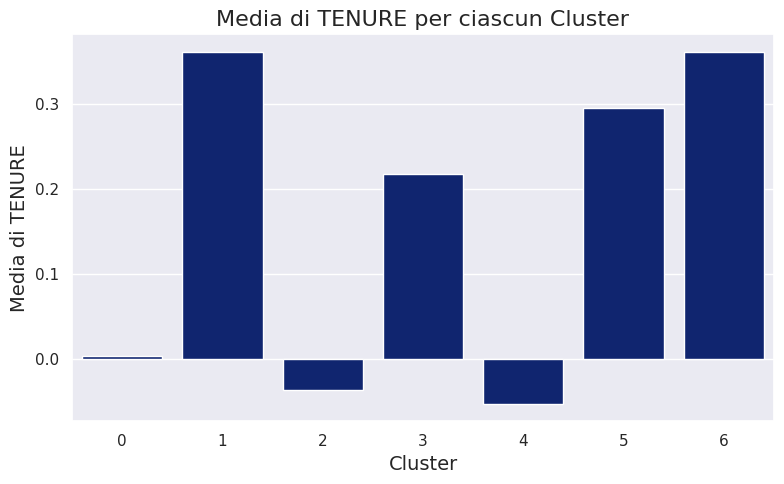

In [ ]:
for column in cluster_summary.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[column])
    plt.title(f'Media di {column} per ciascun Cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel(f'Media di {column}', fontsize=14)
    plt.tight_layout()
    plt.show()

Per il **Cluster 1** si potrebbe cercare di aumentare l'engagement di questi clienti con promozioni che incentivano l'uso della carta, come sconti su acquisti futuri o riduzione delle spese annuali.

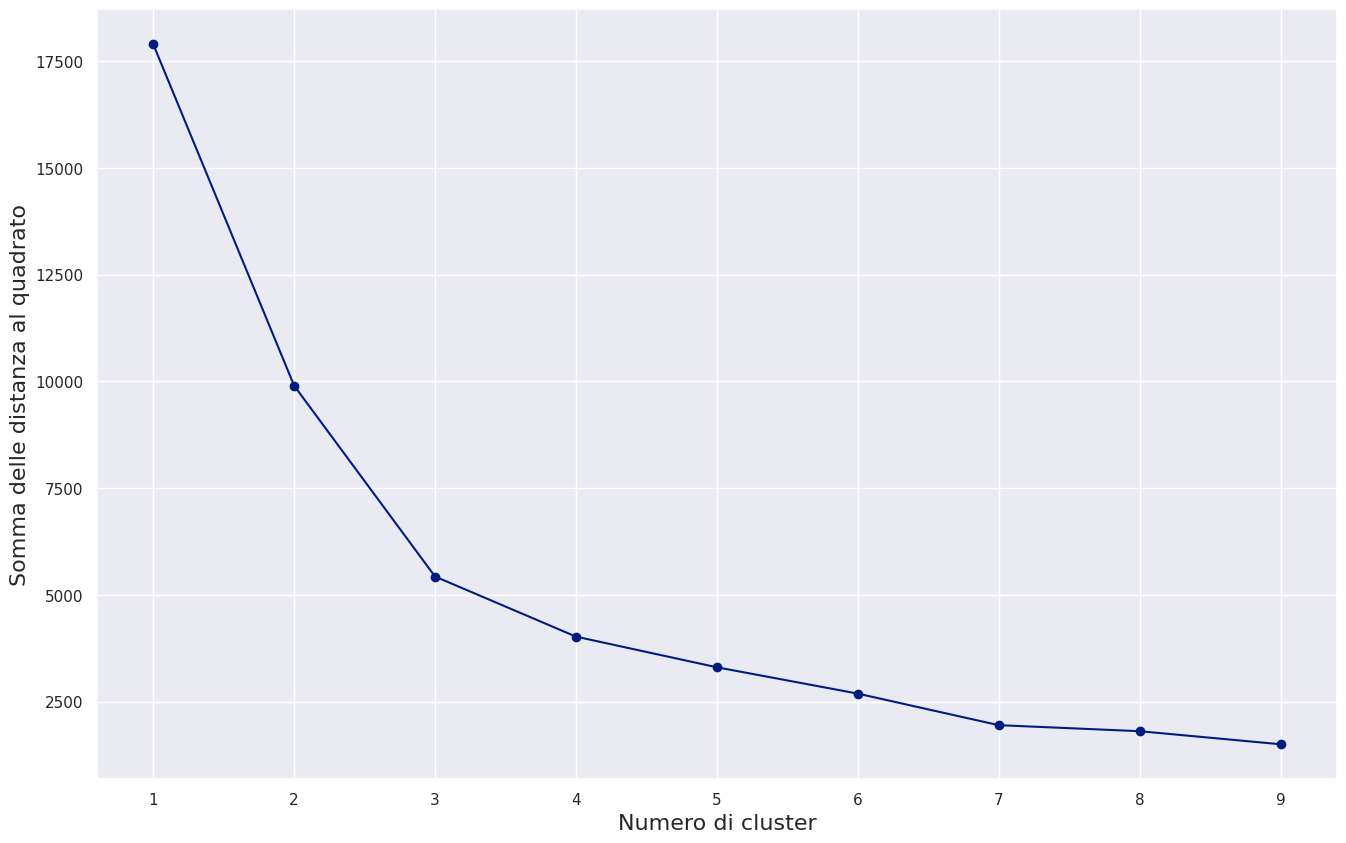

In [ ]:
#Cluster 3:Frequenza di utilizzo della carta (anticipi in contanti, frequenza degli acquisti)
X=df[["CASH_ADVANCE","PURCHASES_FREQUENCY"]].values
plot_ssd_curve(X)

Possiamo stabilire come k ottimale: **K=5** perchè dal 6 in poi la curva decresce quasi linermente.

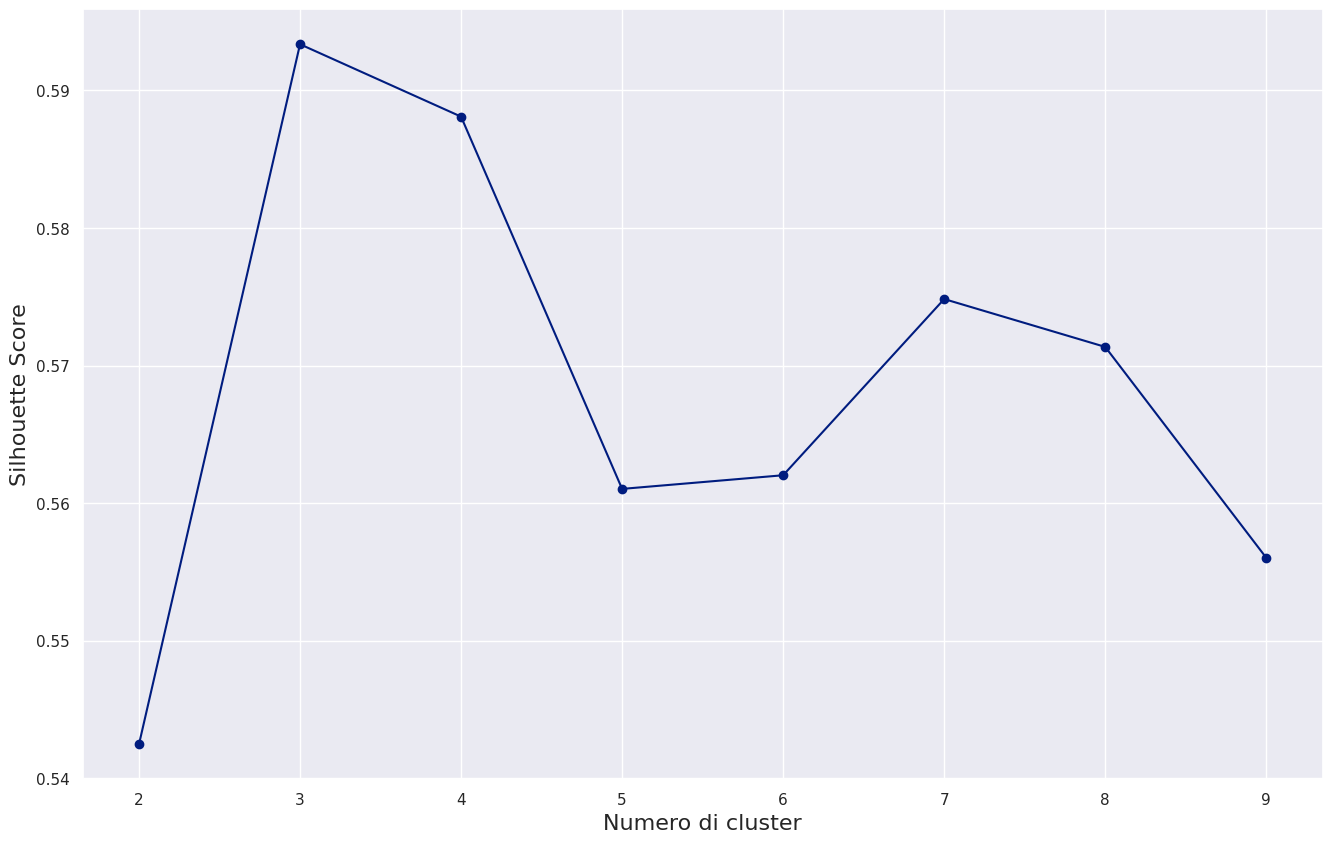

In [ ]:
#Controllo il numero di cluster che massimizza il Silhouette Score per avere un ulteriore criterio per la scelta di k.
silhouette_scores = calculate_silhouette_scores(X)
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o")
plt.xlabel("Numero di cluster", fontsize=16)
plt.ylabel("Silhouette Score", fontsize=16)
plt.show()

In [ ]:
#Utilizzo la tecnica dei kmeans per identificare i gruppi di clienti omogenei
kmeans = KMeans(n_clusters=5, random_state=2, init="k-means++")
kmeans.fit(X)

KMeans(n_clusters=5, random_state=2)

In [ ]:
kmeans.inertia_

3303.4542690906037

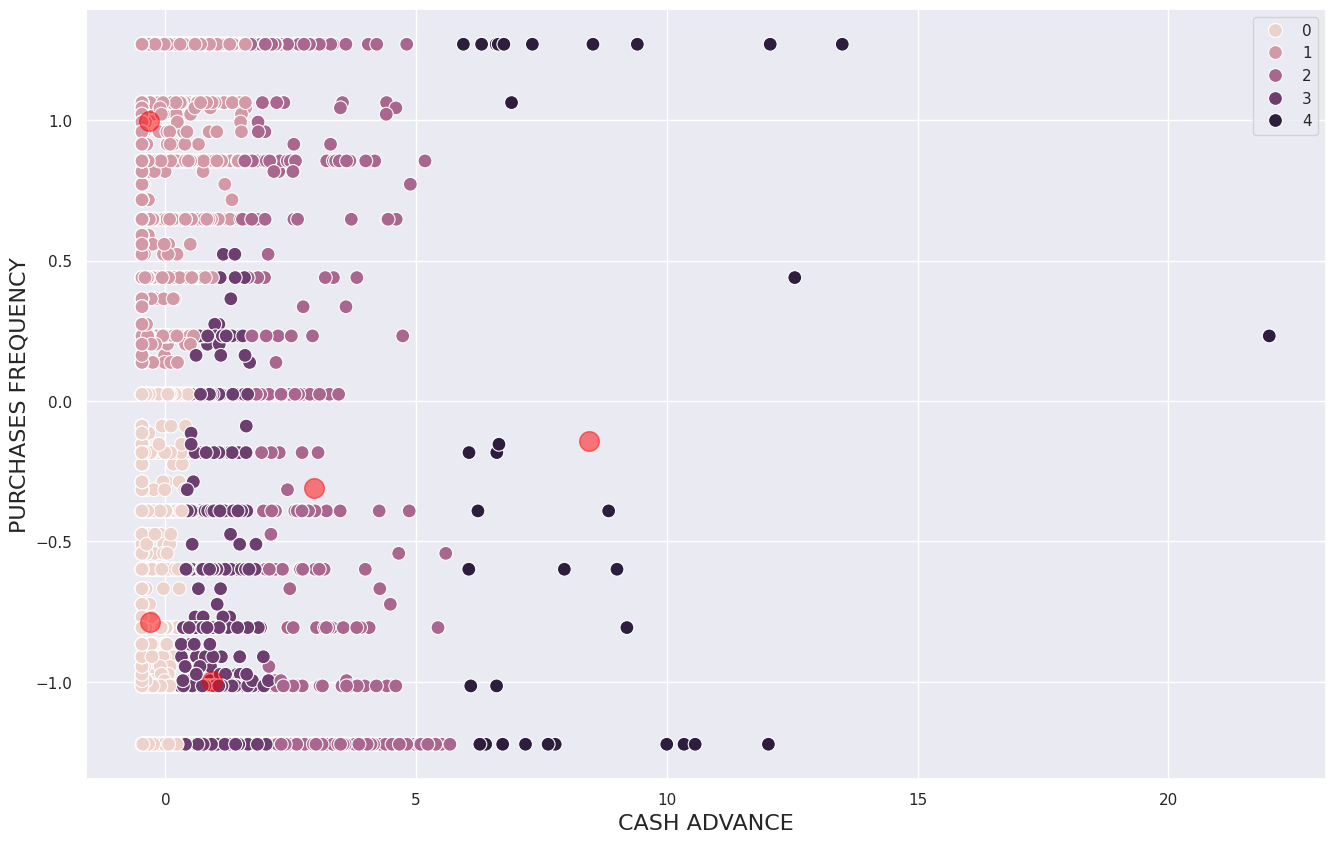

In [ ]:
plot_clusters(kmeans,X,axlabels=["CASH ADVANCE","PURCHASES FREQUENCY"])

In [ ]:
#Assegno i Cluster ai Clienti
df['Cluster'] = kmeans.labels_

In [ ]:
# Calcolo delle medie delle caratteristiche per ciascun cluster
cluster_summary = df.drop("CUST_ID",axis=1).groupby('Cluster').mean()
print(cluster_summary)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0       -0.243249          -0.355080  -0.308838         -0.202997   
1       -0.136170           0.256176   0.381478          0.255807   
2        1.590500           0.270046  -0.113783         -0.099123   
3        0.685798           0.110098  -0.384710         -0.272459   
4        2.159527           0.320704   0.719333          0.755091   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     -0.357151     -0.316457            -0.787618   
1                      0.431940     -0.317721             0.996673   
2                     -0.087224      2.971662            -0.311297   
3                     -0.409107      0.922883            -0.997456   
4                      0.313250      8.439851            -0.141209   

         ONEOFF_PURCHASES

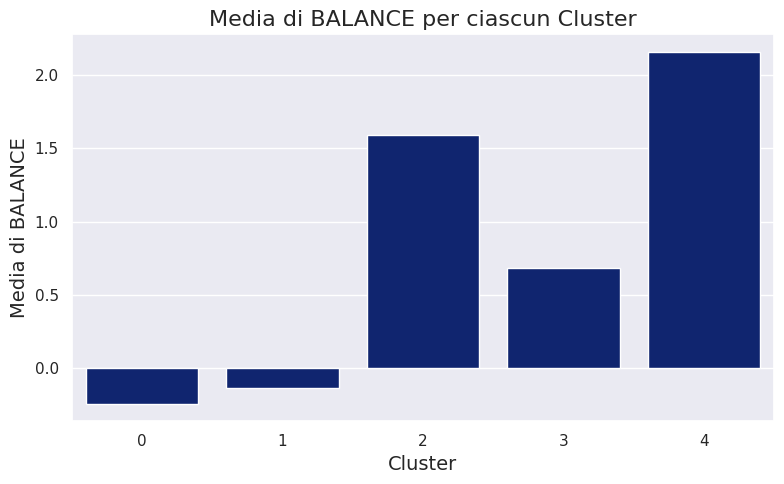

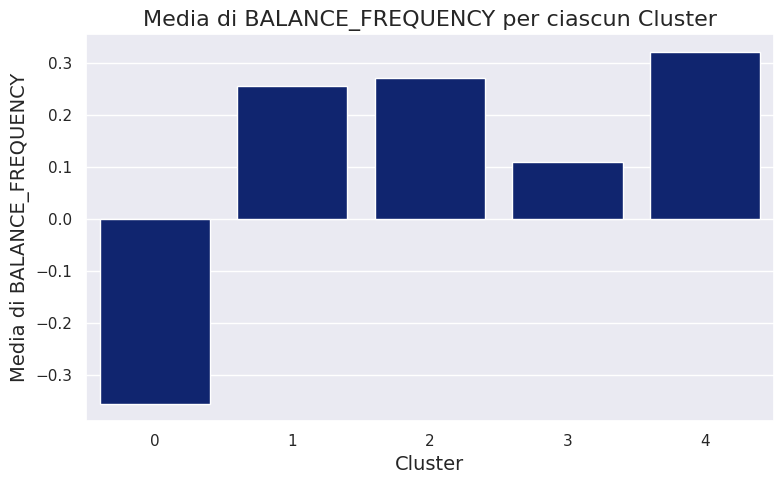

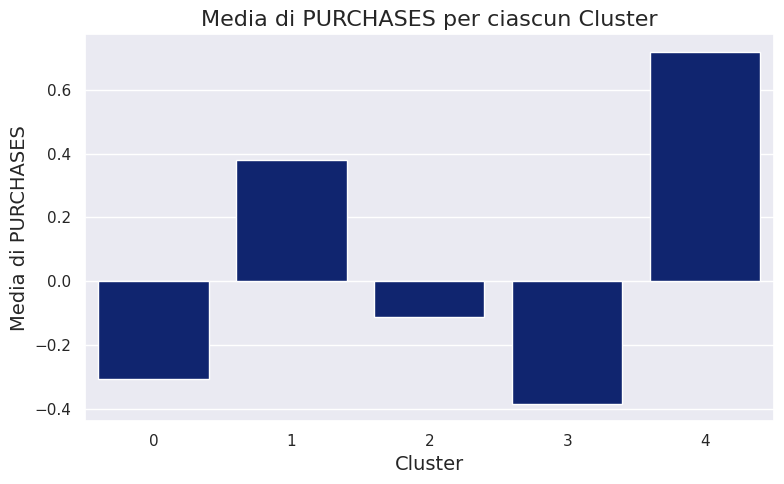

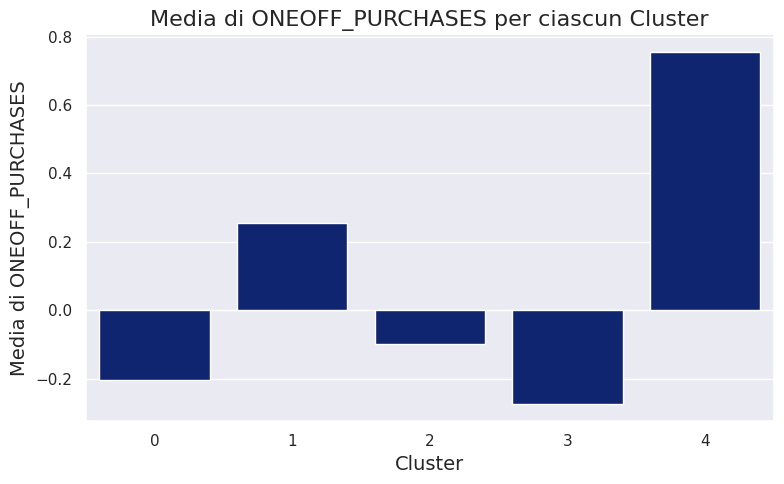

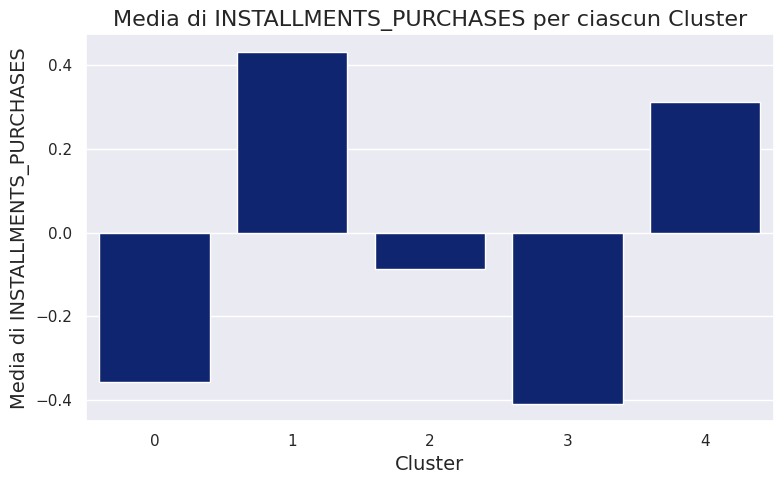

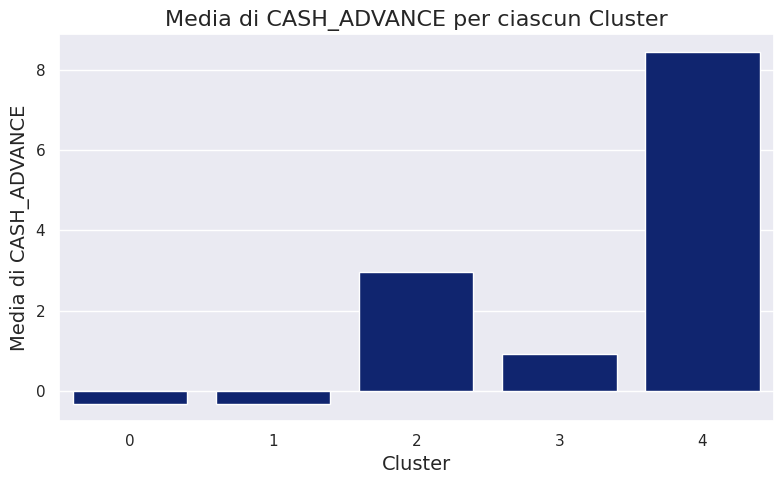

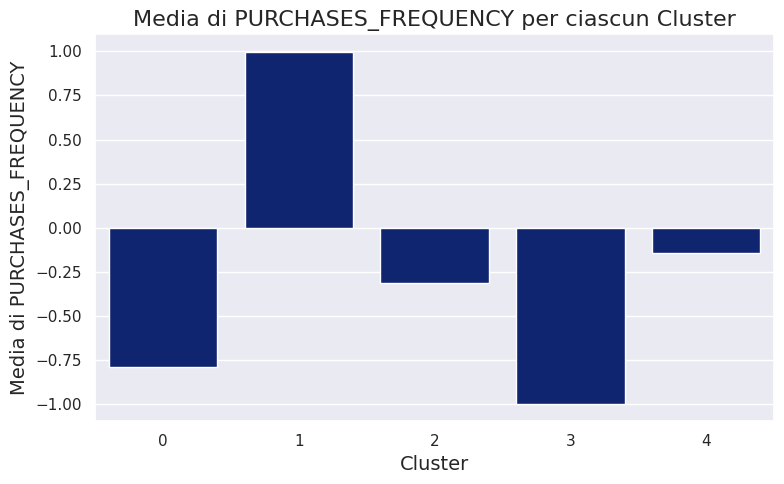

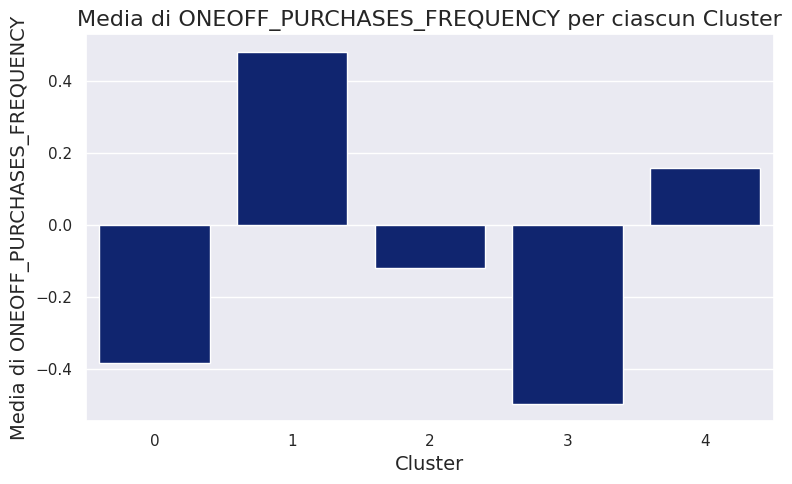

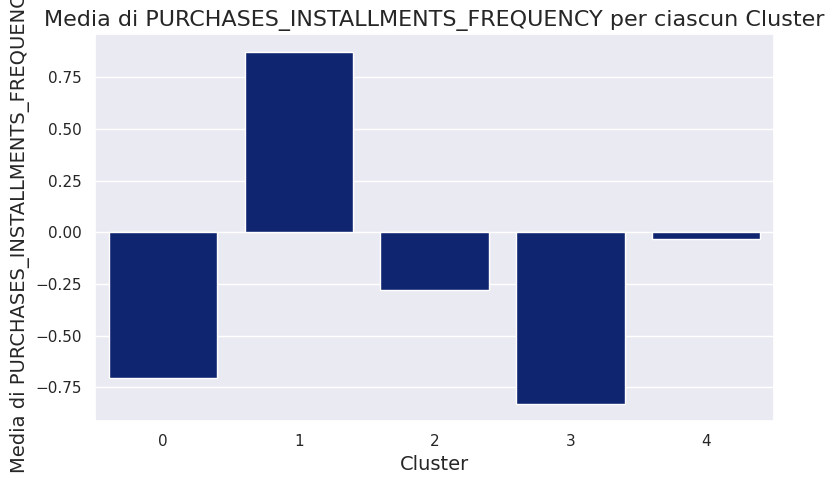

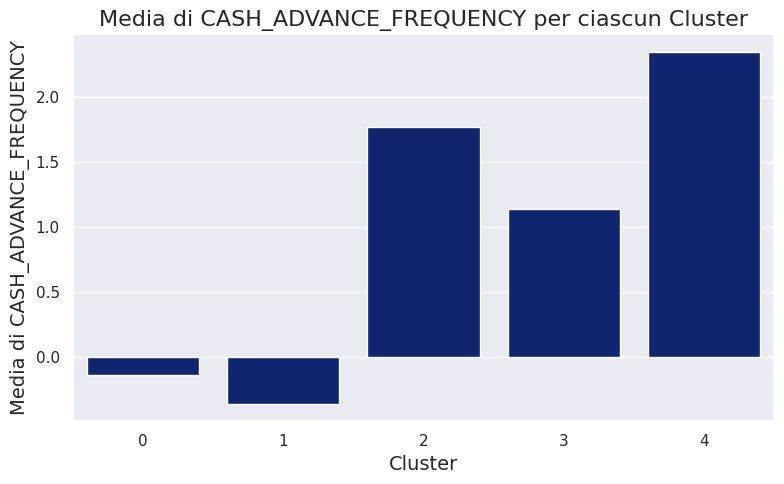

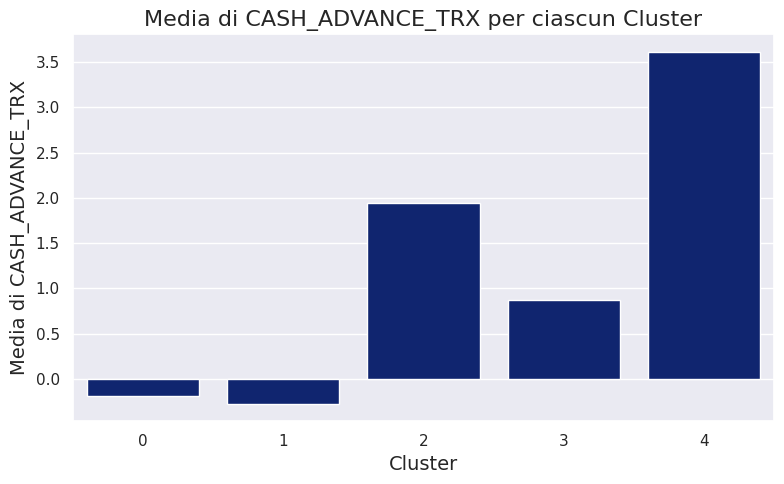

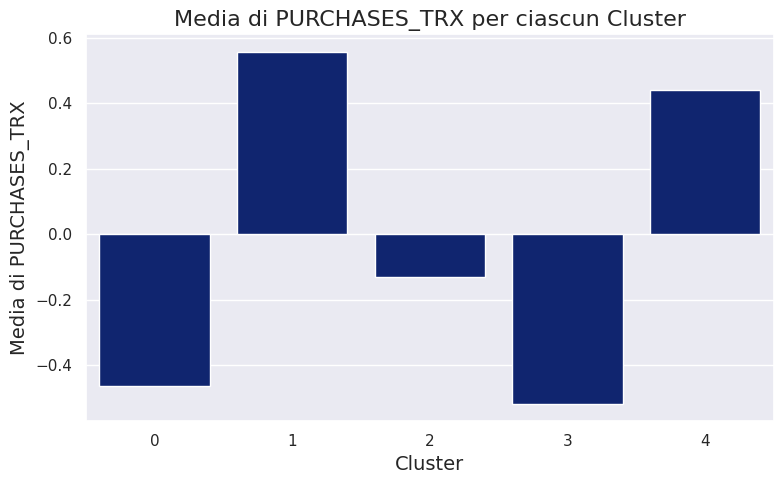

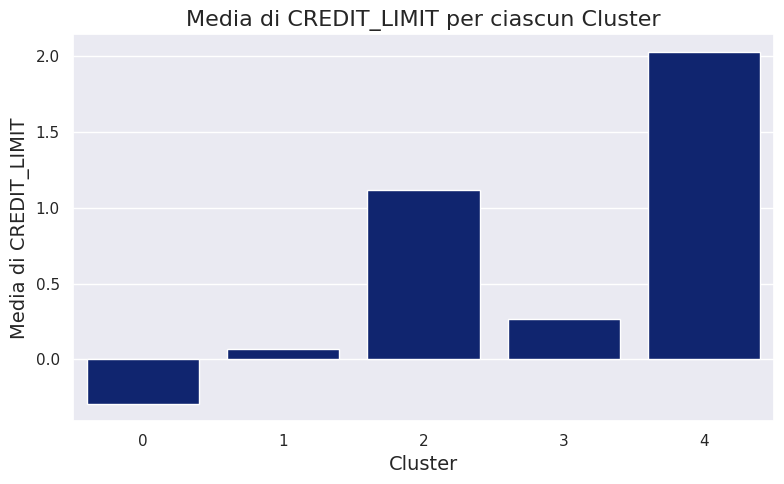

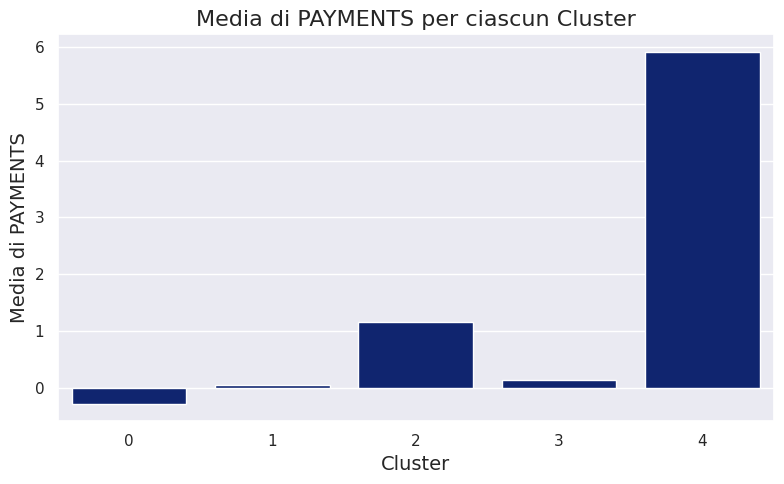

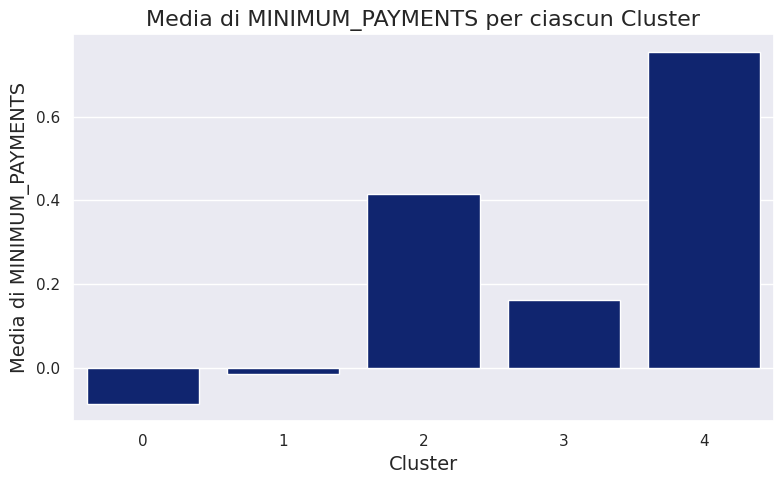

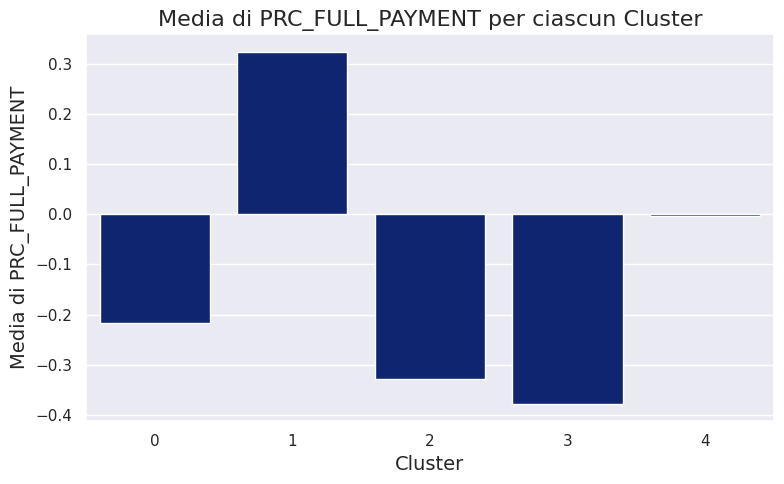

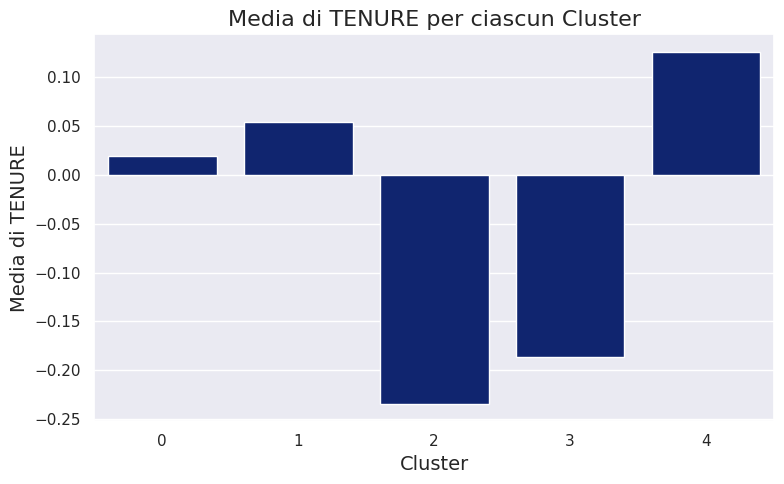

In [ ]:
for column in cluster_summary.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[column])
    plt.title(f'Media di {column} per ciascun Cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel(f'Media di {column}', fontsize=14)
    plt.tight_layout()
    plt.show()

Per il **Cluster 4** che ha Elevato Uso di Anticipo in Contanti si potrebbero offrire consulenze finanziarie o prodotti che aiutano a gestire meglio il flusso di cassa, come linee di credito a condizioni agevolate.